**Desarrollado por:** Javier Fernando Botía Valderrama

*Docente del Departamento de Ingeniería de Sistemas*

**Materia:** Análisis Avanzado de Datos

**Departamento:** Ingeniería Aeroespacial

**Facultad de Ingeniería - Universidad de Antioquia**

# Detección de Anomalías

## Base de datos

In [ ]:
import pandas as pd
import requests
import io

In [ ]:
url = "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/Espectros.csv"
download = requests.get(url).content
data = pd.read_csv(io.StringIO(download.decode('utf-8')), sep = '\t')
display(data.head())

,Espectro 1,Espectro 2,Espectro 3,Espectro 4,Espectro 5,Espectro 6,Espectro 7,Espectro 8,Espectro 9,Espectro 10,...,Espectro 82,Espectro 83,Espectro 84,Espectro 85,Espectro 86,Espectro 87,Espectro 88,Espectro 89,Espectro 90,Espectro 91
0,-210.00,-210.00,-64.02,-210.00,-83.66,-63.43,-59.84,-61.58,-210.00,-210.00,...,-61.80,-210.00,-63.29,-210.00,-210.00,-60.49,-78.61,-210.00,-210.00,-66.17
1,-210.00,-64.63,-210.00,-210.00,-210.00,-210.00,-210.00,-63.48,-210.00,-210.00,...,-69.12,-63.10,-62.05,-69.03,-69.16,-64.39,-210.00,-210.00,-210.00,-210.00
2,-65.39,-68.48,-64.56,-65.30,-67.39,-70.44,-60.92,-63.52,-63.84,-210.00,...,-67.07,-210.00,-64.13,-67.56,-61.75,-69.27,-62.78,-62.91,-69.26,-210.00
3,-210.00,-60.27,-73.57,-83.65,-72.10,-210.00,-65.00,-66.16,-210.00,-63.75,...,-210.00,-210.00,-210.00,-210.00,-210.00,-66.53,-64.01,-66.33,-210.00,-210.00
4,-65.69,-64.45,-210.00,-60.33,-67.97,-68.71,-210.00,-71.10,-61.00,-61.02,...,-210.00,-64.08,-58.07,-63.52,-210.00,-73.36,-70.89,-64.21,-210.00,-210.00


## Exploración de datos

Generamos un informe inicial de la base de datos

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3501 entries, 0 to 3500
Data columns (total 91 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Espectro 1   3501 non-null   float64
 1   Espectro 2   3501 non-null   float64
 2   Espectro 3   3501 non-null   float64
 3   Espectro 4   3501 non-null   float64
 4   Espectro 5   3501 non-null   float64
 5   Espectro 6   3501 non-null   float64
 6   Espectro 7   3501 non-null   float64
 7   Espectro 8   3501 non-null   float64
 8   Espectro 9   3501 non-null   float64
 9   Espectro 10  3501 non-null   float64
 10  Espectro 11  3501 non-null   float64
 11  Espectro 12  3501 non-null   float64
 12  Espectro 13  3501 non-null   float64
 13  Espectro 14  3501 non-null   float64
 14  Espectro 15  3501 non-null   float64
 15  Espectro 16  3501 non-null   float64
 16  Espectro 17  3501 non-null   float64
 17  Espectro 18  3501 non-null   float64
 18  Espectro 19  3501 non-null   float64
 19  Espect

In [ ]:
data = data.astype('float32')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3501 entries, 0 to 3500
Data columns (total 91 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Espectro 1   3501 non-null   float32
 1   Espectro 2   3501 non-null   float32
 2   Espectro 3   3501 non-null   float32
 3   Espectro 4   3501 non-null   float32
 4   Espectro 5   3501 non-null   float32
 5   Espectro 6   3501 non-null   float32
 6   Espectro 7   3501 non-null   float32
 7   Espectro 8   3501 non-null   float32
 8   Espectro 9   3501 non-null   float32
 9   Espectro 10  3501 non-null   float32
 10  Espectro 11  3501 non-null   float32
 11  Espectro 12  3501 non-null   float32
 12  Espectro 13  3501 non-null   float32
 13  Espectro 14  3501 non-null   float32
 14  Espectro 15  3501 non-null   float32
 15  Espectro 16  3501 non-null   float32
 16  Espectro 17  3501 non-null   float32
 17  Espectro 18  3501 non-null   float32
 18  Espectro 19  3501 non-null   float32
 19  Espect

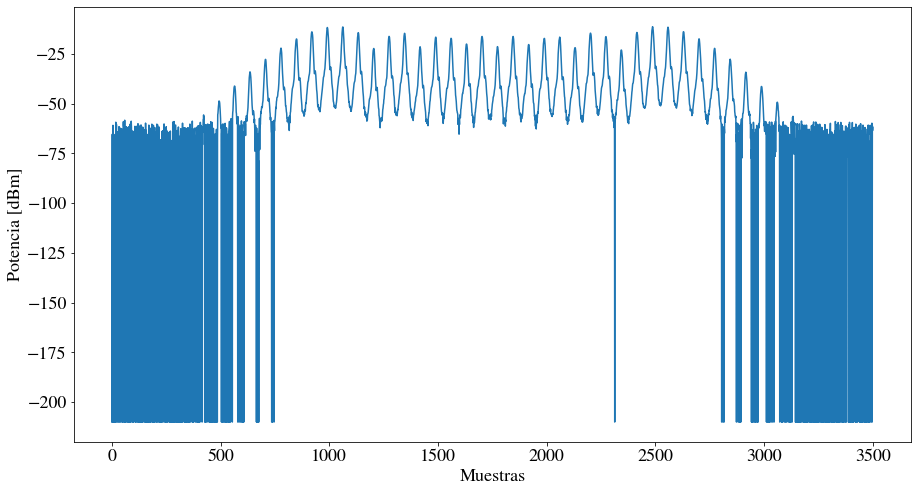

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
plt.figure(figsize=(15,8))
plt.plot(np.arange(0,data.shape[0],1), data['Espectro 1'])
plt.xlabel('Muestras')
plt.ylabel('Potencia [dBm]')
plt.show()

## Detección de Anomalías

Cuando se requiere remover muestras que representan datos atípicos cuando la base de datos es de alta dimensionalidad, se requiere de algoritmos más eficientes para detectar outilers sin perder información útil de los datos. A continuación, analizaremos algunos de ellos:

### Detección de datos atípicos basado en algoritmos de reducción de dimensionalidad

Por lo general, los métodos de reducción de dimensionalidad como PCA, Kernel PCA, ICA, etc..., se utilizan para obtener datos de baja dimensionalidad que permita crear un modelo de machine learning. No obstante, estos métodos también se utilizan para *detección de anomalias*, el cual permite identificar datos atípicos. Sin embargo, es importante considerar que los métodos de reducción de dimensionalidad no pueden capturar toda la información de las características originales de los datos ya que estos métodos se mueven hacia un espacio de baja dimensionalidad. Por esta razón, cuando se identifica datos atípicos con estos métodos, se requiere de una *función de puntaje anomalo* que permite verificar el error de reconstrucción de los datos originales. Lo anterior ayuda a verificar si la eliminación de datos atípicos reduce o no considerablemente la información de la base de datos. 

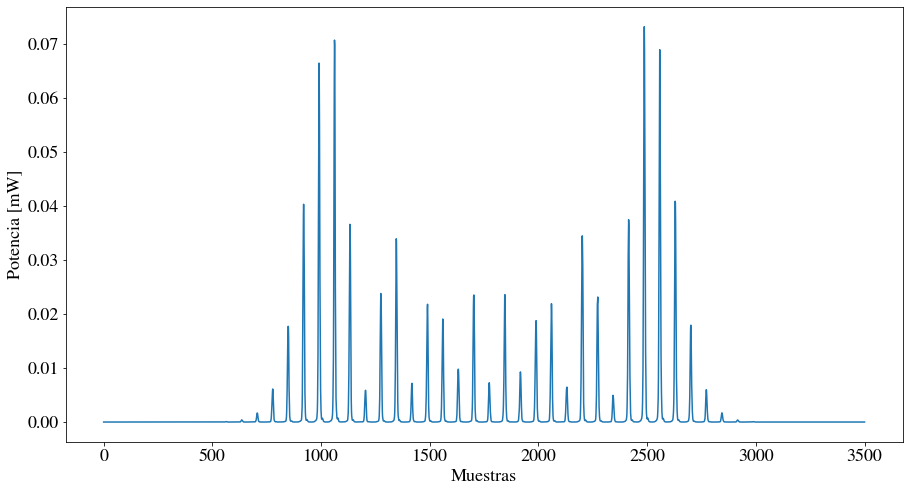

In [ ]:
# Conversión de dBm a mW

data_mW = 10**(data/10)

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
plt.figure(figsize=(15,8))
plt.plot(np.arange(0,data.shape[0],1), data_mW['Espectro 1'])
plt.xlabel('Muestras')
plt.ylabel('Potencia [mW]')
plt.show()

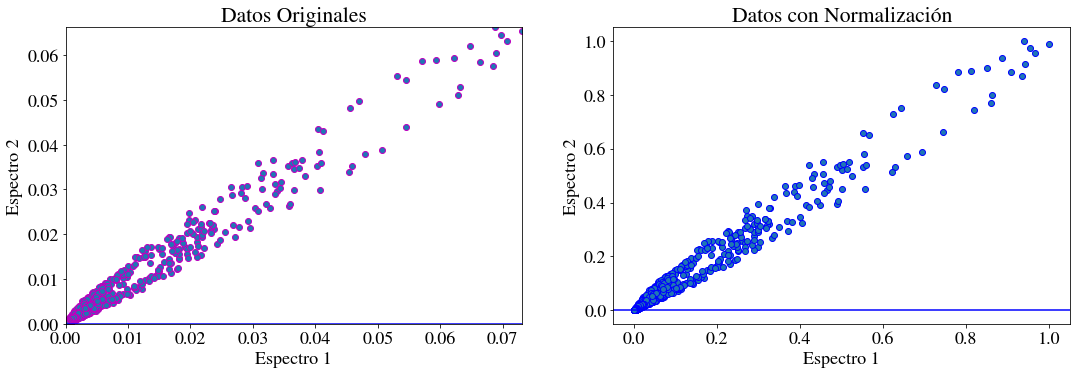

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot
import numpy as np

MMS = MinMaxScaler(copy=True, feature_range=(0, 1))

data_mW_norm = MMS.fit_transform(data_mW)

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

fig = pyplot.figure(figsize=(18,12)) # Se define el tamaño de la figura en ancho y altura    
    
ax = fig.add_subplot(2, 2, 1)   
ax.scatter(data_mW['Espectro 1'], data_mW['Espectro 2'], edgecolors="m")
pyplot.axhline(0, color="blue") # Elegir color de la linea horizontal de referencia
pyplot.xlim(np.min(data_mW['Espectro 1']),np.max(data_mW['Espectro 1'])) # Definir el rango de valores que desea que aparezca en el gráfico en el eje x
pyplot.ylim(np.min(data_mW['Espectro 2']),np.max(data_mW['Espectro 2'])) # Definir el rango de valores que desea que aparezca en el gráfico en el eje y
pyplot.title('Datos Originales') # Titulo de la gráfica
pyplot.xlabel('Espectro 1') # Etiqueta del eje x
pyplot.ylabel('Espectro 2') # Etiqueta del eje y

ax = fig.add_subplot(2, 2, 2) 
ax.scatter(data_mW_norm[:,0], data_mW_norm[:,1], edgecolors="b")
pyplot.axhline(0, color="blue") # Elegir color de la linea horizontal de referencia
pyplot.title('Datos con Normalización') # Titulo de la gráfica
pyplot.xlabel('Espectro 1') # Etiqueta del eje x
pyplot.ylabel('Espectro 2') # Etiqueta del eje y
pyplot.show()

In [ ]:
def anomalidadPuntaje(datos_OR, datos_Reducidos):
  perdida = np.sum((np.array(datos_OR) - np.array(datos_Reducidos))**2, axis = 1)
  perdida = pd.Series(data = perdida, index = datos_OR.index)
  perdida = (perdida - np.min(perdida))/(np.max(perdida) - np.min(perdida))
  return perdida

En la anterior función, la perdida es definida como:

$$L_{n} = \sum_{d=1}^D \vert \vert x_{n,d} - xr_{n,d}\vert \vert^2$$

donde $x_{n,d}$ es un dato de una muestra $n$ con respecto a una característica {d}; $xr_{n,d}$ es una muestra de los datos reconstruidos por un método de reducción de dimensionalidad de una muestra $n$ con respecto a una característica $d$.

Para facilitar la interpretación del puntaje de los datos si son o no atípicos, se recomienda normalizar los datos de las pérdidas, usando min-max.

Para filtrar los datos no anomalos, se crea la siguiente función:

In [ ]:
def data_no_outilers(datas, puntaje, umbral):
  pos = np.where(puntaje < umbral)
  pos = np.asarray(pos)
  pos = np.hstack(pos)
  datos_sin_outilers = datas.loc[pos, :]
  return datos_sin_outilers

A partir de las dos funciones mostradas, aplicaremos PCA para detectar datos atípicos con la base de datos

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns

In [ ]:
pca = PCA(n_components = 20, whiten = False, random_state = 17) # n_components debe ser menor o igual al número de características de los datos
data_pca = pca.fit_transform(data_mW_norm)
data_MMS_pd = pd.DataFrame(data = data_mW_norm)
data_pca = pd.DataFrame(data = data_pca, index = data_MMS_pd.index)
data_pca_inversa = pca.inverse_transform(data_pca)
data_pca_inversa = pd.DataFrame(data = data_pca_inversa, index = data_MMS_pd.index)

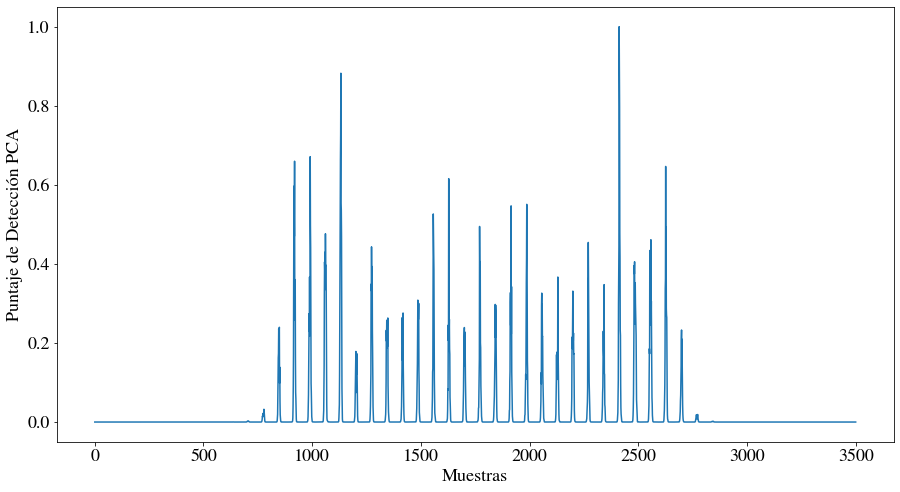

In [ ]:
puntaje_PCA = anomalidadPuntaje(data_MMS_pd, data_pca_inversa)

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
plt.figure(figsize=(15,8))
plt.plot(np.arange(0,puntaje_PCA.shape[0],1), puntaje_PCA)
plt.xlabel('Muestras')
plt.ylabel('Puntaje de Detección PCA')
plt.show()

Para observar generar un umbral de decisión que permita establecer las muestras o filas de nuestra base de datos con presencia de datos atípicos, se define que aquellos datos atípicos con un puntaje menor a 0.05 **no son atípicos**. Este umbral es el utilizado por defecto en este tipo de detección pero se puede variar dicho umbral 

In [ ]:
Datos_MMS_Pandas = pd.DataFrame(data_mW_norm)
data_sin_outilers_PCA = data_no_outilers(Datos_MMS_Pandas, puntaje_PCA, 0.05)
print("Tamaño de los datos originales y normalizados: ",data_mW_norm.shape)
print("Tamaño de los datos filtrados: ", data_sin_outilers_PCA.shape)
print("Número de muestras anomalas: ", data_mW_norm.shape[0] - data_sin_outilers_PCA.shape[0])

Tamaño de los datos originales y normalizados:  (3501, 91)
Tamaño de los datos filtrados:  (3184, 91)
Número de muestras anomalas:  317


In [ ]:
# Conversión de los datos de potencia filtrados en mW a dBm

data_dBm_filtrado = 10*np.log10(data_sin_outilers_PCA.values/1e-3)
pos = np.where(data_dBm_filtrado == np.NINF)
columnas = data.columns
data_dBm_filtrado = pd.DataFrame(data_dBm_filtrado, columns = columnas)
data_dBm_filtrado =data_dBm_filtrado.replace(np.NINF,-210)
display(data_dBm_filtrado.head(10))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


,Espectro 1,Espectro 2,Espectro 3,Espectro 4,Espectro 5,Espectro 6,Espectro 7,Espectro 8,Espectro 9,Espectro 10,...,Espectro 82,Espectro 83,Espectro 84,Espectro 85,Espectro 86,Espectro 87,Espectro 88,Espectro 89,Espectro 90,Espectro 91
0,-210.000000,-210.000000,-23.059996,-210.000000,-42.960007,-22.609999,-19.240002,-20.970001,-210.000000,-210.000000,...,-15.900000,-210.000000,-17.600000,-210.000000,-210.000000,-14.850002,-33.130001,-210.000000,-210.000000,-20.069996
1,-210.000000,-22.840000,-210.000000,-210.000000,-210.000000,-210.000000,-210.000000,-22.870003,-210.000000,-210.000000,...,-23.220003,-17.129999,-16.359999,-23.230000,-23.490005,-18.750002,-210.000000,-210.000000,-210.000000,-210.000000
2,-24.030001,-26.690006,-23.599998,-24.210003,-26.689999,-29.620001,-20.320000,-22.910004,-23.299999,-210.000000,...,-21.169998,-210.000000,-18.439997,-21.759996,-16.080002,-23.629997,-17.299999,-17.400000,-23.820002,-210.000000
3,-210.000000,-18.480000,-32.610001,-42.560001,-31.400002,-210.000000,-24.400002,-25.550003,-210.000000,-23.139999,...,-210.000000,-210.000000,-210.000000,-210.000000,-210.000000,-20.889999,-18.530001,-20.820005,-210.000000,-210.000000
4,-24.330004,-22.659998,-210.000000,-19.240000,-27.270000,-27.889997,-210.000000,-30.489998,-20.459999,-20.410004,...,-210.000000,-18.110001,-12.380001,-17.720001,-210.000000,-27.720001,-25.410000,-18.700001,-210.000000,-210.000000
5,-19.570000,-210.000000,-28.870003,-210.000000,-20.800001,-210.000000,-23.669996,-210.000000,-22.910004,-22.110004,...,-17.990000,-34.070000,-210.000000,-210.000000,-210.000000,-210.000000,-210.000000,-210.000000,-23.680004,-14.519998
6,-20.280001,-20.750004,-30.340002,-21.000002,-21.920002,-210.000000,-22.610001,-210.000000,-210.000000,-210.000000,...,-24.570000,-14.140003,-210.000000,-18.719995,-210.000000,-210.000000,-21.700001,-210.000000,-210.000000,-210.000000
7,-210.000000,-210.000000,-210.000000,-210.000000,-26.120003,-210.000000,-210.000000,-210.000000,-25.870003,-210.000000,...,-210.000000,-13.149997,-210.000000,-22.750006,-210.000000,-20.030001,-210.000000,-210.000000,-19.269999,-19.430000
8,-210.000000,-210.000000,-210.000000,-25.310003,-25.430000,-23.910006,-210.000000,-210.000000,-25.389999,-22.230000,...,-210.000000,-22.070000,-210.000000,-210.000000,-23.560005,-210.000000,-210.000000,-20.000002,-16.870001,-210.000000
9,-24.080002,-210.000000,-21.240004,-210.000000,-210.000000,-210.000000,-26.770004,-32.550007,-30.400005,-210.000000,...,-14.259998,-19.979998,-18.210003,-26.460003,-16.709999,-210.000000,-15.459999,-25.760000,-210.000000,-17.190001


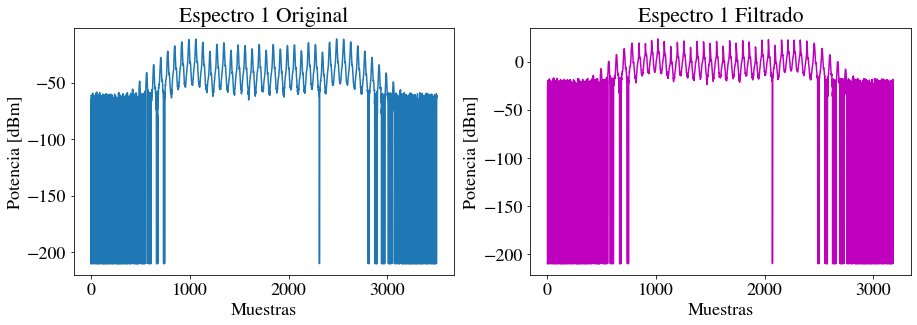

In [ ]:
matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(2, 2, 1)
ax.plot(np.arange(0,data.shape[0],1), data['Espectro 1'])
plt.xlabel('Muestras')
plt.ylabel('Potencia [dBm]')
plt.title('Espectro 1 Original')

ax = fig.add_subplot(2, 2, 2)
ax.plot(np.arange(0,data_dBm_filtrado.shape[0],1), data_dBm_filtrado['Espectro 1'],'m')
plt.xlabel('Muestras')
plt.ylabel('Potencia [dBm]')
plt.title('Espectro 1 Filtrado')

plt.show()

### Detección de datos atípicos basado en KPCA

In [ ]:
from sklearn.decomposition import KernelPCA

In [ ]:
kpca = KernelPCA(n_components = 10, kernel = 'poly', degree = 5, gamma = 0.9, 
                 coef0 = 1, tol = 1e-3, max_iter = 1000, fit_inverse_transform = True) 
# n_components debe ser menor o igual al número de características de los datos
# Importante habilitar la opción fit_inverse_transform = True
data_kpca = kpca.fit_transform(data_mW)
Datos_MMS_pd = pd.DataFrame(data = data_mW)
data_kpca = pd.DataFrame(data = data_kpca, index = Datos_MMS_pd.index)
data_kpca_inversa = kpca.inverse_transform(data_kpca)

In [ ]:
data_kpca_inversa = pd.DataFrame(data = data_kpca_inversa, index = Datos_MMS_pd.index)
puntaje_KPCA = anomalidadPuntaje(Datos_MMS_pd, data_kpca_inversa)

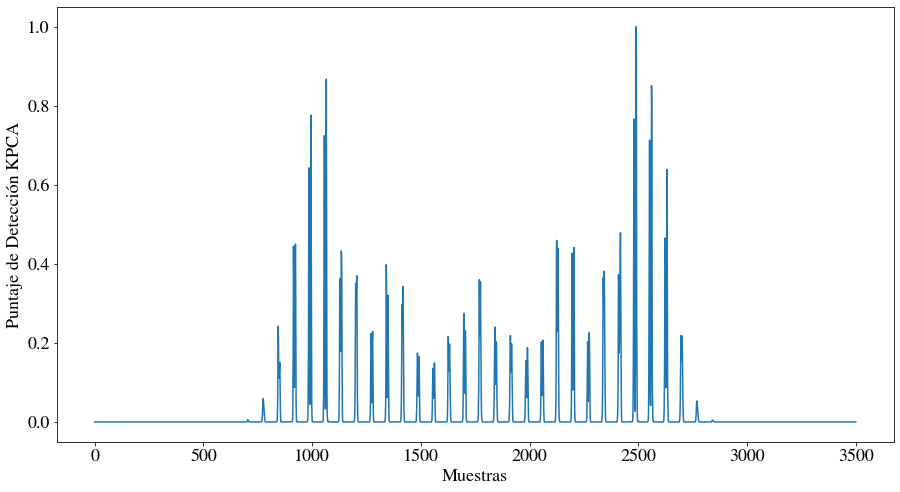

In [ ]:
matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
plt.figure(figsize=(15,8))
plt.plot(np.arange(0,puntaje_KPCA.shape[0],1), puntaje_KPCA)
plt.xlabel('Muestras')
plt.ylabel('Puntaje de Detección KPCA')
plt.show()

In [ ]:
Datos_MMS_Pandas = pd.DataFrame(data_mW_norm)
data_sin_outilers_KPCA = data_no_outilers(Datos_MMS_Pandas, puntaje_KPCA, 0.05)
print("Tamaño de los datos originales y normalizados: ",data_mW_norm.shape)
print("Tamaño de los datos filtrados: ", data_sin_outilers_KPCA.shape)
print("Número de muestras anomalas: ", data_mW_norm.shape[0] - data_sin_outilers_KPCA.shape[0])

Tamaño de los datos originales y normalizados:  (3501, 91)
Tamaño de los datos filtrados:  (3129, 91)
Número de muestras anomalas:  372


In [ ]:
data_dBm_filtrado_KPCA = 10*np.log10(data_sin_outilers_KPCA.values/1e-3)
pos = np.where(data_dBm_filtrado_KPCA == np.NINF)
columnas = data.columns
data_dBm_filtrado_KPCA = pd.DataFrame(data_dBm_filtrado_KPCA, columns = columnas)
data_dBm_filtrado_KPCA = data_dBm_filtrado_KPCA.replace(np.NINF,-210)
display(data_dBm_filtrado_KPCA.head(10))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


,Espectro 1,Espectro 2,Espectro 3,Espectro 4,Espectro 5,Espectro 6,Espectro 7,Espectro 8,Espectro 9,Espectro 10,...,Espectro 82,Espectro 83,Espectro 84,Espectro 85,Espectro 86,Espectro 87,Espectro 88,Espectro 89,Espectro 90,Espectro 91
0,-210.000000,-210.000000,-23.059996,-210.000000,-42.960007,-22.609999,-19.240002,-20.970001,-210.000000,-210.000000,...,-15.900000,-210.000000,-17.600000,-210.000000,-210.000000,-14.850002,-33.130001,-210.000000,-210.000000,-20.069996
1,-210.000000,-22.840000,-210.000000,-210.000000,-210.000000,-210.000000,-210.000000,-22.870003,-210.000000,-210.000000,...,-23.220003,-17.129999,-16.359999,-23.230000,-23.490005,-18.750002,-210.000000,-210.000000,-210.000000,-210.000000
2,-24.030001,-26.690006,-23.599998,-24.210003,-26.689999,-29.620001,-20.320000,-22.910004,-23.299999,-210.000000,...,-21.169998,-210.000000,-18.439997,-21.759996,-16.080002,-23.629997,-17.299999,-17.400000,-23.820002,-210.000000
3,-210.000000,-18.480000,-32.610001,-42.560001,-31.400002,-210.000000,-24.400002,-25.550003,-210.000000,-23.139999,...,-210.000000,-210.000000,-210.000000,-210.000000,-210.000000,-20.889999,-18.530001,-20.820005,-210.000000,-210.000000
4,-24.330004,-22.659998,-210.000000,-19.240000,-27.270000,-27.889997,-210.000000,-30.489998,-20.459999,-20.410004,...,-210.000000,-18.110001,-12.380001,-17.720001,-210.000000,-27.720001,-25.410000,-18.700001,-210.000000,-210.000000
5,-19.570000,-210.000000,-28.870003,-210.000000,-20.800001,-210.000000,-23.669996,-210.000000,-22.910004,-22.110004,...,-17.990000,-34.070000,-210.000000,-210.000000,-210.000000,-210.000000,-210.000000,-210.000000,-23.680004,-14.519998
6,-20.280001,-20.750004,-30.340002,-21.000002,-21.920002,-210.000000,-22.610001,-210.000000,-210.000000,-210.000000,...,-24.570000,-14.140003,-210.000000,-18.719995,-210.000000,-210.000000,-21.700001,-210.000000,-210.000000,-210.000000
7,-210.000000,-210.000000,-210.000000,-210.000000,-26.120003,-210.000000,-210.000000,-210.000000,-25.870003,-210.000000,...,-210.000000,-13.149997,-210.000000,-22.750006,-210.000000,-20.030001,-210.000000,-210.000000,-19.269999,-19.430000
8,-210.000000,-210.000000,-210.000000,-25.310003,-25.430000,-23.910006,-210.000000,-210.000000,-25.389999,-22.230000,...,-210.000000,-22.070000,-210.000000,-210.000000,-23.560005,-210.000000,-210.000000,-20.000002,-16.870001,-210.000000
9,-24.080002,-210.000000,-21.240004,-210.000000,-210.000000,-210.000000,-26.770004,-32.550007,-30.400005,-210.000000,...,-14.259998,-19.979998,-18.210003,-26.460003,-16.709999,-210.000000,-15.459999,-25.760000,-210.000000,-17.190001


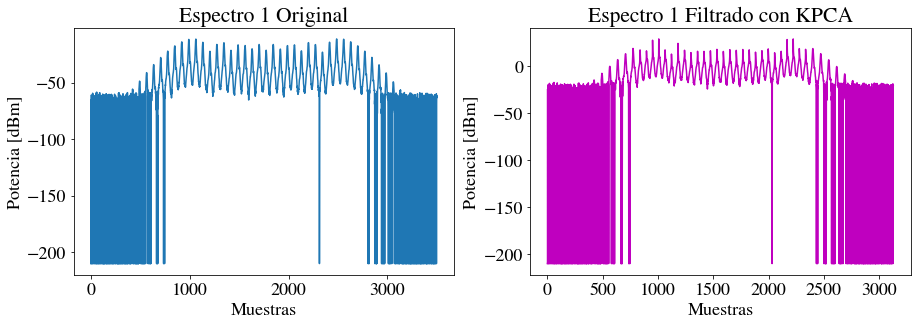

In [ ]:
matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(2, 2, 1)
ax.plot(np.arange(0,data.shape[0],1), data['Espectro 1'])
plt.xlabel('Muestras')
plt.ylabel('Potencia [dBm]')
plt.title('Espectro 1 Original')

ax = fig.add_subplot(2, 2, 2)
ax.plot(np.arange(0,data_dBm_filtrado_KPCA.shape[0],1), data_dBm_filtrado_KPCA['Espectro 1'],'m')
plt.xlabel('Muestras')
plt.ylabel('Potencia [dBm]')
plt.title('Espectro 1 Filtrado con KPCA')

plt.show()

### Detección de datos atípicos con el algoritmo de aislamiento forestal

Este algoritmo aisla las muestras por selectividad aleatoria de una característica de los datos, estableciendo un valor de referencia o umbral que divide entre los valores máximos y mínimos de una característica. Para realizar esta división, el algoritmo genera particiones de los datos que es representado mediante una estructura de un árbol de decisión (lo verán en la materia de aprendizaje automático 1 en la especialización), donde cada partición aisla una o más muestras que representen datos atípicos. 

Para que la detección de datos atípicos sea eficiente, el algoritmo genera un bosque de árboles aleatoriamente donde se calcula las longitudes de las ramificaciones de los árboles. Por regla general, este algoritmo establece que aquellas longitudes que sean más cortas para una o más muestras, se consideran como *datos atípicos*- 

Veamos un ejemplo de aplicación de este algoritmo.

In [ ]:
from sklearn.ensemble import IsolationForest # algoritmo de aislamiento forestal
from sklearn.model_selection import GridSearchCV

In [ ]:
estimadores = np.arange(100, 500, 50) # Rango de valores de los estimadores

In [ ]:
def puntaje_IF_Grid_CV(estimator, X):
  return np.mean(estimator.score_samples(X))

In [ ]:
parametros = {'n_estimators': estimadores, 'max_samples':['auto'],
     'contamination': [0.05], 'max_features':[1],
     'bootstrap':[True], 'n_jobs':[None,1,2], 'random_state':[None,1,], 
     'verbose':[0,1,2], 'warm_start':[True]}  

In [ ]:
IF = GridSearchCV(IsolationForest(), parametros, scoring = puntaje_IF_Grid_CV) 
IF.fit(data_mW_norm)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have v

Building estimator 1 of 100 for this parallel run (total 100)...
Building estimator 2 of 100 for this parallel run (total 100)...
Building estimator 3 of 100 for this parallel run (total 100)...
Building estimator 4 of 100 for this parallel run (total 100)...
Building estimator 5 of 100 for this parallel run (total 100)...
Building estimator 6 of 100 for this parallel run (total 100)...
Building estimator 7 of 100 for this parallel run (total 100)...
Building estimator 8 of 100 for this parallel run (total 100)...
Building estimator 9 of 100 for this parallel run (total 100)...
Building estimator 10 of 100 for this parallel run (total 100)...
Building estimator 11 of 100 for this parallel run (total 100)...
Building estimator 12 of 100 for this parallel run (total 100)...
Building estimator 13 of 100 for this parallel run (total 100)...
Building estimator 14 of 100 for this parallel run (total 100)...
Building estimator 15 of 100 for this parallel run (total 100)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 5 of 100 for this parallel run (total 100)...
Building estimator 6 of 100 for this parallel run (total 100)...
Building estimator 7 of 100 for this parallel run (total 100)...
Building estimator 8 of 100 for this parallel run (total 100)...
Building estimator 9 of 100 for this parallel run (total 100)...
Building estimator 10 of 100 for this parallel run (total 100)...
Building estimator 11 of 100 for this parallel run (total 100)...
Building estimator 12 of 100 for this parallel run (total 100)...
Building estimator 13 of 100 for this parallel run (total 100)...
Building estimator 14 of 100 for this parallel run (total 100)...
Building estimator 15 of 100 for this parallel run (total 100)...
Building estimator 16 of 100 for this parallel run (total 100)...
Building estimator 17 of 100 for this parallel run (total 100)...
Building estimator 18 of 100 for this parallel run (total 100)...
Building estimator 19 of 100 for this parallel run (total 100)...
Building estima

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 4 of 100 for this parallel run (total 100)...
Building estimator 5 of 100 for this parallel run (total 100)...
Building estimator 6 of 100 for this parallel run (total 100)...
Building estimator 7 of 100 for this parallel run (total 100)...
Building estimator 8 of 100 for this parallel run (total 100)...
Building estimator 9 of 100 for this parallel run (total 100)...
Building estimator 10 of 100 for this parallel run (total 100)...
Building estimator 11 of 100 for this parallel run (total 100)...
Building estimator 12 of 100 for this parallel run (total 100)...
Building estimator 13 of 100 for this parallel run (total 100)...
Building estimator 14 of 100 for this parallel run (total 100)...
Building estimator 15 of 100 for this parallel run (total 100)...
Building estimator 16 of 100 for this parallel run (total 100)...
Building estimator 17 of 100 for this parallel run (total 100)...
Building estimator 18 of 100 for this parallel run (total 100)...
Building estimat

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 100 for this parallel run (total 100)...
Building estimator 2 of 100 for this parallel run (total 100)...
Building estimator 3 of 100 for this parallel run (total 100)...
Building estimator 4 of 100 for this parallel run (total 100)...
Building estimator 5 of 100 for this parallel run (total 100)...
Building estimator 6 of 100 for this parallel run (total 100)...
Building estimator 7 of 100 for this parallel run (total 100)...
Building estimator 8 of 100 for this parallel run (total 100)...
Building estimator 9 of 100 for this parallel run (total 100)...
Building estimator 10 of 100 for this parallel run (total 100)...
Building estimator 11 of 100 for this parallel run (total 100)...
Building estimator 12 of 100 for this parallel run (total 100)...
Building estimator 13 of 100 for this parallel run (total 100)...
Building estimator 14 of 100 for this parallel run (total 100)...
Building estimator 15 of 100 for this parallel run (total 100)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 100 for this parallel run (total 100)...
Building estimator 2 of 100 for this parallel run (total 100)...
Building estimator 3 of 100 for this parallel run (total 100)...
Building estimator 4 of 100 for this parallel run (total 100)...
Building estimator 5 of 100 for this parallel run (total 100)...
Building estimator 6 of 100 for this parallel run (total 100)...
Building estimator 7 of 100 for this parallel run (total 100)...
Building estimator 8 of 100 for this parallel run (total 100)...
Building estimator 9 of 100 for this parallel run (total 100)...
Building estimator 10 of 100 for this parallel run (total 100)...
Building estimator 11 of 100 for this parallel run (total 100)...
Building estimator 12 of 100 for this parallel run (total 100)...
Building estimator 13 of 100 for this parallel run (total 100)...
Building estimator 14 of 100 for this parallel run (total 100)...
Building estimator 15 of 100 for this parallel run (total 100)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-

Building estimator 1 of 100 for this parallel run (total 100)...
Building estimator 2 of 100 for this parallel run (total 100)...
Building estimator 3 of 100 for this parallel run (total 100)...
Building estimator 4 of 100 for this parallel run (total 100)...
Building estimator 5 of 100 for this parallel run (total 100)...
Building estimator 6 of 100 for this parallel run (total 100)...
Building estimator 7 of 100 for this parallel run (total 100)...
Building estimator 8 of 100 for this parallel run (total 100)...
Building estimator 9 of 100 for this parallel run (total 100)...
Building estimator 10 of 100 for this parallel run (total 100)...
Building estimator 11 of 100 for this parallel run (total 100)...
Building estimator 12 of 100 for this parallel run (total 100)...
Building estimator 13 of 100 for this parallel run (total 100)...
Building estimator 14 of 100 for this parallel run (total 100)...
Building estimator 15 of 100 for this parallel run (total 100)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 100 for this parallel run (total 100)...
Building estimator 2 of 100 for this parallel run (total 100)...
Building estimator 3 of 100 for this parallel run (total 100)...
Building estimator 4 of 100 for this parallel run (total 100)...
Building estimator 5 of 100 for this parallel run (total 100)...
Building estimator 6 of 100 for this parallel run (total 100)...
Building estimator 7 of 100 for this parallel run (total 100)...
Building estimator 8 of 100 for this parallel run (total 100)...
Building estimator 9 of 100 for this parallel run (total 100)...
Building estimator 10 of 100 for this parallel run (total 100)...
Building estimator 11 of 100 for this parallel run (total 100)...
Building estimator 12 of 100 for this parallel run (total 100)...
Building estimator 13 of 100 for this parallel run (total 100)...
Building estimator 14 of 100 for this parallel run (total 100)...
Building estimator 15 of 100 for this parallel run (total 100)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 3 of 100 for this parallel run (total 100)...
Building estimator 4 of 100 for this parallel run (total 100)...
Building estimator 5 of 100 for this parallel run (total 100)...
Building estimator 6 of 100 for this parallel run (total 100)...
Building estimator 7 of 100 for this parallel run (total 100)...
Building estimator 8 of 100 for this parallel run (total 100)...
Building estimator 9 of 100 for this parallel run (total 100)...
Building estimator 10 of 100 for this parallel run (total 100)...
Building estimator 11 of 100 for this parallel run (total 100)...
Building estimator 12 of 100 for this parallel run (total 100)...
Building estimator 13 of 100 for this parallel run (total 100)...
Building estimator 14 of 100 for this parallel run (total 100)...
Building estimator 15 of 100 for this parallel run (total 100)...
Building estimator 16 of 100 for this parallel run (total 100)...
Building estimator 17 of 100 for this parallel run (total 100)...
Building estimato

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



Building estimator 4 of 100 for this parallel run (total 100)...
Building estimator 5 of 100 for this parallel run (total 100)...
Building estimator 6 of 100 for this parallel run (total 100)...
Building estimator 7 of 100 for this parallel run (total 100)...
Building estimator 8 of 100 for this parallel run (total 100)...
Building estimator 9 of 100 for this parallel run (total 100)...
Building estimator 10 of 100 for this parallel run (total 100)...
Building estimator 11 of 100 for this parallel run (total 100)...
Building estimator 12 of 100 for this parallel run (total 100)...
Building estimator 13 of 100 for this parallel run (total 100)...
Building estimator 14 of 100 for this parallel run (total 100)...
Building estimator 15 of 100 for this parallel run (total 100)...
Building estimator 16 of 100 for this parallel run (total 100)...
Building estimator 17 of 100 for this parallel run (total 100)...
Building estimator 18 of 100 for this parallel run (total 100)...
Building estima

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 9 of 100 for this parallel run (total 100)...
Building estimator 10 of 100 for this parallel run (total 100)...
Building estimator 11 of 100 for this parallel run (total 100)...
Building estimator 12 of 100 for this parallel run (total 100)...
Building estimator 13 of 100 for this parallel run (total 100)...
Building estimator 14 of 100 for this parallel run (total 100)...
Building estimator 15 of 100 for this parallel run (total 100)...
Building estimator 16 of 100 for this parallel run (total 100)...
Building estimator 17 of 100 for this parallel run (total 100)...
Building estimator 18 of 100 for this parallel run (total 100)...
Building estimator 19 of 100 for this parallel run (total 100)...
Building estimator 20 of 100 for this parallel run (total 100)...
Building estimator 21 of 100 for this parallel run (total 100)...
Building estimator 22 of 100 for this parallel run (total 100)...
Building estimator 23 of 100 for this parallel run (total 100)...
Building es

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-

Building estimator 1 of 100 for this parallel run (total 100)...
Building estimator 2 of 100 for this parallel run (total 100)...
Building estimator 3 of 100 for this parallel run (total 100)...
Building estimator 4 of 100 for this parallel run (total 100)...
Building estimator 5 of 100 for this parallel run (total 100)...
Building estimator 6 of 100 for this parallel run (total 100)...
Building estimator 7 of 100 for this parallel run (total 100)...
Building estimator 8 of 100 for this parallel run (total 100)...
Building estimator 9 of 100 for this parallel run (total 100)...
Building estimator 10 of 100 for this parallel run (total 100)...
Building estimator 11 of 100 for this parallel run (total 100)...
Building estimator 12 of 100 for this parallel run (total 100)...
Building estimator 13 of 100 for this parallel run (total 100)...
Building estimator 14 of 100 for this parallel run (total 100)...
Building estimator 15 of 100 for this parallel run (total 100)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 100 for this parallel run (total 100)...
Building estimator 2 of 100 for this parallel run (total 100)...
Building estimator 3 of 100 for this parallel run (total 100)...
Building estimator 4 of 100 for this parallel run (total 100)...
Building estimator 5 of 100 for this parallel run (total 100)...
Building estimator 6 of 100 for this parallel run (total 100)...
Building estimator 7 of 100 for this parallel run (total 100)...
Building estimator 8 of 100 for this parallel run (total 100)...
Building estimator 9 of 100 for this parallel run (total 100)...
Building estimator 10 of 100 for this parallel run (total 100)...
Building estimator 11 of 100 for this parallel run (total 100)...
Building estimator 12 of 100 for this parallel run (total 100)...
Building estimator 13 of 100 for this parallel run (total 100)...
Building estimator 14 of 100 for this parallel run (total 100)...
Building estimator 15 of 100 for this parallel run (total 100)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 6 of 100 for this parallel run (total 100)...
Building estimator 7 of 100 for this parallel run (total 100)...
Building estimator 8 of 100 for this parallel run (total 100)...
Building estimator 9 of 100 for this parallel run (total 100)...
Building estimator 10 of 100 for this parallel run (total 100)...
Building estimator 11 of 100 for this parallel run (total 100)...
Building estimator 12 of 100 for this parallel run (total 100)...
Building estimator 13 of 100 for this parallel run (total 100)...
Building estimator 14 of 100 for this parallel run (total 100)...
Building estimator 15 of 100 for this parallel run (total 100)...
Building estimator 16 of 100 for this parallel run (total 100)...
Building estimator 17 of 100 for this parallel run (total 100)...
Building estimator 18 of 100 for this parallel run (total 100)...
Building estimator 19 of 100 for this parallel run (total 100)...
Building estimator 20 of 100 for this parallel run (total 100)...
Building estim

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 3 of 100 for this parallel run (total 100)...
Building estimator 4 of 100 for this parallel run (total 100)...
Building estimator 5 of 100 for this parallel run (total 100)...
Building estimator 6 of 100 for this parallel run (total 100)...
Building estimator 7 of 100 for this parallel run (total 100)...
Building estimator 8 of 100 for this parallel run (total 100)...
Building estimator 9 of 100 for this parallel run (total 100)...
Building estimator 10 of 100 for this parallel run (total 100)...
Building estimator 11 of 100 for this parallel run (total 100)...
Building estimator 12 of 100 for this parallel run (total 100)...
Building estimator 13 of 100 for this parallel run (total 100)...
Building estimator 14 of 100 for this parallel run (total 100)...
Building estimator 15 of 100 for this parallel run (total 100)...
Building estimator 16 of 100 for this parallel run (total 100)...
Building estimator 17 of 100 for this parallel run (total 100)...
Building estimato

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 5 of 100 for this parallel run (total 100)...
Building estimator 6 of 100 for this parallel run (total 100)...
Building estimator 7 of 100 for this parallel run (total 100)...
Building estimator 8 of 100 for this parallel run (total 100)...
Building estimator 9 of 100 for this parallel run (total 100)...
Building estimator 10 of 100 for this parallel run (total 100)...
Building estimator 11 of 100 for this parallel run (total 100)...
Building estimator 12 of 100 for this parallel run (total 100)...
Building estimator 13 of 100 for this parallel run (total 100)...
Building estimator 14 of 100 for this parallel run (total 100)...
Building estimator 15 of 100 for this parallel run (total 100)...
Building estimator 16 of 100 for this parallel run (total 100)...
Building estimator 17 of 100 for this parallel run (total 100)...
Building estimator 18 of 100 for this parallel run (total 100)...
Building estimator 19 of 100 for this parallel run (total 100)...
Building estima

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-

Building estimator 1 of 100 for this parallel run (total 100)...
Building estimator 2 of 100 for this parallel run (total 100)...
Building estimator 3 of 100 for this parallel run (total 100)...
Building estimator 4 of 100 for this parallel run (total 100)...
Building estimator 5 of 100 for this parallel run (total 100)...
Building estimator 6 of 100 for this parallel run (total 100)...
Building estimator 7 of 100 for this parallel run (total 100)...
Building estimator 8 of 100 for this parallel run (total 100)...
Building estimator 9 of 100 for this parallel run (total 100)...
Building estimator 10 of 100 for this parallel run (total 100)...
Building estimator 11 of 100 for this parallel run (total 100)...
Building estimator 12 of 100 for this parallel run (total 100)...
Building estimator 13 of 100 for this parallel run (total 100)...
Building estimator 14 of 100 for this parallel run (total 100)...
Building estimator 15 of 100 for this parallel run (total 100)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 2 of 100 for this parallel run (total 100)...
Building estimator 3 of 100 for this parallel run (total 100)...
Building estimator 4 of 100 for this parallel run (total 100)...
Building estimator 5 of 100 for this parallel run (total 100)...
Building estimator 6 of 100 for this parallel run (total 100)...
Building estimator 7 of 100 for this parallel run (total 100)...
Building estimator 8 of 100 for this parallel run (total 100)...
Building estimator 9 of 100 for this parallel run (total 100)...
Building estimator 10 of 100 for this parallel run (total 100)...
Building estimator 11 of 100 for this parallel run (total 100)...
Building estimator 12 of 100 for this parallel run (total 100)...
Building estimator 13 of 100 for this parallel run (total 100)...
Building estimator 14 of 100 for this parallel run (total 100)...
Building estimator 15 of 100 for this parallel run (total 100)...
Building estimator 16 of 100 for this parallel run (total 100)...
Building estimator

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 100 for this parallel run (total 100)...
Building estimator 2 of 100 for this parallel run (total 100)...
Building estimator 3 of 100 for this parallel run (total 100)...
Building estimator 4 of 100 for this parallel run (total 100)...
Building estimator 5 of 100 for this parallel run (total 100)...
Building estimator 6 of 100 for this parallel run (total 100)...
Building estimator 7 of 100 for this parallel run (total 100)...
Building estimator 8 of 100 for this parallel run (total 100)...
Building estimator 9 of 100 for this parallel run (total 100)...
Building estimator 10 of 100 for this parallel run (total 100)...
Building estimator 11 of 100 for this parallel run (total 100)...
Building estimator 12 of 100 for this parallel run (total 100)...
Building estimator 13 of 100 for this parallel run (total 100)...
Building estimator 14 of 100 for this parallel run (total 100)...
Building estimator 15 of 100 for this parallel run (total 100)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 100 for this parallel run (total 100)...
Building estimator 2 of 100 for this parallel run (total 100)...
Building estimator 3 of 100 for this parallel run (total 100)...
Building estimator 4 of 100 for this parallel run (total 100)...
Building estimator 5 of 100 for this parallel run (total 100)...
Building estimator 6 of 100 for this parallel run (total 100)...
Building estimator 7 of 100 for this parallel run (total 100)...
Building estimator 8 of 100 for this parallel run (total 100)...
Building estimator 9 of 100 for this parallel run (total 100)...
Building estimator 10 of 100 for this parallel run (total 100)...
Building estimator 11 of 100 for this parallel run (total 100)...
Building estimator 12 of 100 for this parallel run (total 100)...
Building estimator 13 of 100 for this parallel run (total 100)...
Building estimator 14 of 100 for this parallel run (total 100)...
Building estimator 15 of 100 for this parallel run (total 100)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 100 for this parallel run (total 100)...
Building estimator 2 of 100 for this parallel run (total 100)...
Building estimator 3 of 100 for this parallel run (total 100)...
Building estimator 4 of 100 for this parallel run (total 100)...
Building estimator 5 of 100 for this parallel run (total 100)...
Building estimator 6 of 100 for this parallel run (total 100)...
Building estimator 7 of 100 for this parallel run (total 100)...
Building estimator 8 of 100 for this parallel run (total 100)...
Building estimator 9 of 100 for this parallel run (total 100)...
Building estimator 10 of 100 for this parallel run (total 100)...
Building estimator 11 of 100 for this parallel run (total 100)...
Building estimator 12 of 100 for this parallel run (total 100)...
Building estimator 13 of 100 for this parallel run (total 100)...
Building estimator 14 of 100 for this parallel run (total 100)...
Building estimator 15 of 100 for this parallel run (total 100)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-

Building estimator 1 of 150 for this parallel run (total 150)...
Building estimator 2 of 150 for this parallel run (total 150)...
Building estimator 3 of 150 for this parallel run (total 150)...
Building estimator 4 of 150 for this parallel run (total 150)...
Building estimator 5 of 150 for this parallel run (total 150)...
Building estimator 6 of 150 for this parallel run (total 150)...
Building estimator 7 of 150 for this parallel run (total 150)...
Building estimator 8 of 150 for this parallel run (total 150)...
Building estimator 9 of 150 for this parallel run (total 150)...
Building estimator 10 of 150 for this parallel run (total 150)...
Building estimator 11 of 150 for this parallel run (total 150)...
Building estimator 12 of 150 for this parallel run (total 150)...
Building estimator 13 of 150 for this parallel run (total 150)...
Building estimator 14 of 150 for this parallel run (total 150)...
Building estimator 15 of 150 for this parallel run (total 150)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 150 for this parallel run (total 150)...
Building estimator 2 of 150 for this parallel run (total 150)...
Building estimator 3 of 150 for this parallel run (total 150)...
Building estimator 4 of 150 for this parallel run (total 150)...
Building estimator 5 of 150 for this parallel run (total 150)...
Building estimator 6 of 150 for this parallel run (total 150)...
Building estimator 7 of 150 for this parallel run (total 150)...
Building estimator 8 of 150 for this parallel run (total 150)...
Building estimator 9 of 150 for this parallel run (total 150)...
Building estimator 10 of 150 for this parallel run (total 150)...
Building estimator 11 of 150 for this parallel run (total 150)...
Building estimator 12 of 150 for this parallel run (total 150)...
Building estimator 13 of 150 for this parallel run (total 150)...
Building estimator 14 of 150 for this parallel run (total 150)...
Building estimator 15 of 150 for this parallel run (total 150)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 150 for this parallel run (total 150)...
Building estimator 2 of 150 for this parallel run (total 150)...
Building estimator 3 of 150 for this parallel run (total 150)...
Building estimator 4 of 150 for this parallel run (total 150)...
Building estimator 5 of 150 for this parallel run (total 150)...
Building estimator 6 of 150 for this parallel run (total 150)...
Building estimator 7 of 150 for this parallel run (total 150)...
Building estimator 8 of 150 for this parallel run (total 150)...
Building estimator 9 of 150 for this parallel run (total 150)...
Building estimator 10 of 150 for this parallel run (total 150)...
Building estimator 11 of 150 for this parallel run (total 150)...
Building estimator 12 of 150 for this parallel run (total 150)...
Building estimator 13 of 150 for this parallel run (total 150)...
Building estimator 14 of 150 for this parallel run (total 150)...
Building estimator 15 of 150 for this parallel run (total 150)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 150 for this parallel run (total 150)...
Building estimator 2 of 150 for this parallel run (total 150)...
Building estimator 3 of 150 for this parallel run (total 150)...
Building estimator 4 of 150 for this parallel run (total 150)...
Building estimator 5 of 150 for this parallel run (total 150)...
Building estimator 6 of 150 for this parallel run (total 150)...
Building estimator 7 of 150 for this parallel run (total 150)...
Building estimator 8 of 150 for this parallel run (total 150)...
Building estimator 9 of 150 for this parallel run (total 150)...
Building estimator 10 of 150 for this parallel run (total 150)...
Building estimator 11 of 150 for this parallel run (total 150)...
Building estimator 12 of 150 for this parallel run (total 150)...
Building estimator 13 of 150 for this parallel run (total 150)...
Building estimator 14 of 150 for this parallel run (total 150)...
Building estimator 15 of 150 for this parallel run (total 150)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 150 for this parallel run (total 150)...
Building estimator 2 of 150 for this parallel run (total 150)...
Building estimator 3 of 150 for this parallel run (total 150)...
Building estimator 4 of 150 for this parallel run (total 150)...
Building estimator 5 of 150 for this parallel run (total 150)...
Building estimator 6 of 150 for this parallel run (total 150)...
Building estimator 7 of 150 for this parallel run (total 150)...
Building estimator 8 of 150 for this parallel run (total 150)...
Building estimator 9 of 150 for this parallel run (total 150)...
Building estimator 10 of 150 for this parallel run (total 150)...
Building estimator 11 of 150 for this parallel run (total 150)...
Building estimator 12 of 150 for this parallel run (total 150)...
Building estimator 13 of 150 for this parallel run (total 150)...
Building estimator 14 of 150 for this parallel run (total 150)...
Building estimator 15 of 150 for this parallel run (total 150)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-

Building estimator 1 of 150 for this parallel run (total 150)...
Building estimator 2 of 150 for this parallel run (total 150)...
Building estimator 3 of 150 for this parallel run (total 150)...
Building estimator 4 of 150 for this parallel run (total 150)...
Building estimator 5 of 150 for this parallel run (total 150)...
Building estimator 6 of 150 for this parallel run (total 150)...
Building estimator 7 of 150 for this parallel run (total 150)...
Building estimator 8 of 150 for this parallel run (total 150)...
Building estimator 9 of 150 for this parallel run (total 150)...
Building estimator 10 of 150 for this parallel run (total 150)...
Building estimator 11 of 150 for this parallel run (total 150)...
Building estimator 12 of 150 for this parallel run (total 150)...
Building estimator 13 of 150 for this parallel run (total 150)...
Building estimator 14 of 150 for this parallel run (total 150)...
Building estimator 15 of 150 for this parallel run (total 150)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 150 for this parallel run (total 150)...
Building estimator 2 of 150 for this parallel run (total 150)...
Building estimator 3 of 150 for this parallel run (total 150)...
Building estimator 4 of 150 for this parallel run (total 150)...
Building estimator 5 of 150 for this parallel run (total 150)...
Building estimator 6 of 150 for this parallel run (total 150)...
Building estimator 7 of 150 for this parallel run (total 150)...
Building estimator 8 of 150 for this parallel run (total 150)...
Building estimator 9 of 150 for this parallel run (total 150)...
Building estimator 10 of 150 for this parallel run (total 150)...
Building estimator 11 of 150 for this parallel run (total 150)...
Building estimator 12 of 150 for this parallel run (total 150)...
Building estimator 13 of 150 for this parallel run (total 150)...
Building estimator 14 of 150 for this parallel run (total 150)...
Building estimator 15 of 150 for this parallel run (total 150)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 150 for this parallel run (total 150)...
Building estimator 2 of 150 for this parallel run (total 150)...
Building estimator 3 of 150 for this parallel run (total 150)...
Building estimator 4 of 150 for this parallel run (total 150)...
Building estimator 5 of 150 for this parallel run (total 150)...
Building estimator 6 of 150 for this parallel run (total 150)...
Building estimator 7 of 150 for this parallel run (total 150)...
Building estimator 8 of 150 for this parallel run (total 150)...
Building estimator 9 of 150 for this parallel run (total 150)...
Building estimator 10 of 150 for this parallel run (total 150)...
Building estimator 11 of 150 for this parallel run (total 150)...
Building estimator 12 of 150 for this parallel run (total 150)...
Building estimator 13 of 150 for this parallel run (total 150)...
Building estimator 14 of 150 for this parallel run (total 150)...
Building estimator 15 of 150 for this parallel run (total 150)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 150 for this parallel run (total 150)...
Building estimator 2 of 150 for this parallel run (total 150)...
Building estimator 3 of 150 for this parallel run (total 150)...
Building estimator 4 of 150 for this parallel run (total 150)...
Building estimator 5 of 150 for this parallel run (total 150)...
Building estimator 6 of 150 for this parallel run (total 150)...
Building estimator 7 of 150 for this parallel run (total 150)...
Building estimator 8 of 150 for this parallel run (total 150)...
Building estimator 9 of 150 for this parallel run (total 150)...
Building estimator 10 of 150 for this parallel run (total 150)...
Building estimator 11 of 150 for this parallel run (total 150)...
Building estimator 12 of 150 for this parallel run (total 150)...
Building estimator 13 of 150 for this parallel run (total 150)...
Building estimator 14 of 150 for this parallel run (total 150)...
Building estimator 15 of 150 for this parallel run (total 150)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 150 for this parallel run (total 150)...
Building estimator 2 of 150 for this parallel run (total 150)...
Building estimator 3 of 150 for this parallel run (total 150)...
Building estimator 4 of 150 for this parallel run (total 150)...
Building estimator 5 of 150 for this parallel run (total 150)...
Building estimator 6 of 150 for this parallel run (total 150)...
Building estimator 7 of 150 for this parallel run (total 150)...
Building estimator 8 of 150 for this parallel run (total 150)...
Building estimator 9 of 150 for this parallel run (total 150)...
Building estimator 10 of 150 for this parallel run (total 150)...
Building estimator 11 of 150 for this parallel run (total 150)...
Building estimator 12 of 150 for this parallel run (total 150)...
Building estimator 13 of 150 for this parallel run (total 150)...
Building estimator 14 of 150 for this parallel run (total 150)...
Building estimator 15 of 150 for this parallel run (total 150)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-

Building estimator 1 of 150 for this parallel run (total 150)...
Building estimator 2 of 150 for this parallel run (total 150)...
Building estimator 3 of 150 for this parallel run (total 150)...
Building estimator 4 of 150 for this parallel run (total 150)...
Building estimator 5 of 150 for this parallel run (total 150)...
Building estimator 6 of 150 for this parallel run (total 150)...
Building estimator 7 of 150 for this parallel run (total 150)...
Building estimator 8 of 150 for this parallel run (total 150)...
Building estimator 9 of 150 for this parallel run (total 150)...
Building estimator 10 of 150 for this parallel run (total 150)...
Building estimator 11 of 150 for this parallel run (total 150)...
Building estimator 12 of 150 for this parallel run (total 150)...
Building estimator 13 of 150 for this parallel run (total 150)...
Building estimator 14 of 150 for this parallel run (total 150)...
Building estimator 15 of 150 for this parallel run (total 150)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 150 for this parallel run (total 150)...
Building estimator 2 of 150 for this parallel run (total 150)...
Building estimator 3 of 150 for this parallel run (total 150)...
Building estimator 4 of 150 for this parallel run (total 150)...
Building estimator 5 of 150 for this parallel run (total 150)...
Building estimator 6 of 150 for this parallel run (total 150)...
Building estimator 7 of 150 for this parallel run (total 150)...
Building estimator 8 of 150 for this parallel run (total 150)...
Building estimator 9 of 150 for this parallel run (total 150)...
Building estimator 10 of 150 for this parallel run (total 150)...
Building estimator 11 of 150 for this parallel run (total 150)...
Building estimator 12 of 150 for this parallel run (total 150)...
Building estimator 13 of 150 for this parallel run (total 150)...
Building estimator 14 of 150 for this parallel run (total 150)...
Building estimator 15 of 150 for this parallel run (total 150)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 150 for this parallel run (total 150)...
Building estimator 2 of 150 for this parallel run (total 150)...
Building estimator 3 of 150 for this parallel run (total 150)...
Building estimator 4 of 150 for this parallel run (total 150)...
Building estimator 5 of 150 for this parallel run (total 150)...
Building estimator 6 of 150 for this parallel run (total 150)...
Building estimator 7 of 150 for this parallel run (total 150)...
Building estimator 8 of 150 for this parallel run (total 150)...
Building estimator 9 of 150 for this parallel run (total 150)...
Building estimator 10 of 150 for this parallel run (total 150)...
Building estimator 11 of 150 for this parallel run (total 150)...
Building estimator 12 of 150 for this parallel run (total 150)...
Building estimator 13 of 150 for this parallel run (total 150)...
Building estimator 14 of 150 for this parallel run (total 150)...
Building estimator 15 of 150 for this parallel run (total 150)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 150 for this parallel run (total 150)...
Building estimator 2 of 150 for this parallel run (total 150)...
Building estimator 3 of 150 for this parallel run (total 150)...
Building estimator 4 of 150 for this parallel run (total 150)...
Building estimator 5 of 150 for this parallel run (total 150)...
Building estimator 6 of 150 for this parallel run (total 150)...
Building estimator 7 of 150 for this parallel run (total 150)...
Building estimator 8 of 150 for this parallel run (total 150)...
Building estimator 9 of 150 for this parallel run (total 150)...
Building estimator 10 of 150 for this parallel run (total 150)...
Building estimator 11 of 150 for this parallel run (total 150)...
Building estimator 12 of 150 for this parallel run (total 150)...
Building estimator 13 of 150 for this parallel run (total 150)...
Building estimator 14 of 150 for this parallel run (total 150)...
Building estimator 15 of 150 for this parallel run (total 150)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 150 for this parallel run (total 150)...
Building estimator 2 of 150 for this parallel run (total 150)...
Building estimator 3 of 150 for this parallel run (total 150)...
Building estimator 4 of 150 for this parallel run (total 150)...
Building estimator 5 of 150 for this parallel run (total 150)...
Building estimator 6 of 150 for this parallel run (total 150)...
Building estimator 7 of 150 for this parallel run (total 150)...
Building estimator 8 of 150 for this parallel run (total 150)...
Building estimator 9 of 150 for this parallel run (total 150)...
Building estimator 10 of 150 for this parallel run (total 150)...
Building estimator 11 of 150 for this parallel run (total 150)...
Building estimator 12 of 150 for this parallel run (total 150)...
Building estimator 13 of 150 for this parallel run (total 150)...
Building estimator 14 of 150 for this parallel run (total 150)...
Building estimator 15 of 150 for this parallel run (total 150)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-

Building estimator 1 of 150 for this parallel run (total 150)...
Building estimator 2 of 150 for this parallel run (total 150)...
Building estimator 3 of 150 for this parallel run (total 150)...
Building estimator 4 of 150 for this parallel run (total 150)...
Building estimator 5 of 150 for this parallel run (total 150)...
Building estimator 6 of 150 for this parallel run (total 150)...
Building estimator 7 of 150 for this parallel run (total 150)...
Building estimator 8 of 150 for this parallel run (total 150)...
Building estimator 9 of 150 for this parallel run (total 150)...
Building estimator 10 of 150 for this parallel run (total 150)...
Building estimator 11 of 150 for this parallel run (total 150)...
Building estimator 12 of 150 for this parallel run (total 150)...
Building estimator 13 of 150 for this parallel run (total 150)...
Building estimator 14 of 150 for this parallel run (total 150)...
Building estimator 15 of 150 for this parallel run (total 150)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 150 for this parallel run (total 150)...
Building estimator 2 of 150 for this parallel run (total 150)...
Building estimator 3 of 150 for this parallel run (total 150)...
Building estimator 4 of 150 for this parallel run (total 150)...
Building estimator 5 of 150 for this parallel run (total 150)...
Building estimator 6 of 150 for this parallel run (total 150)...
Building estimator 7 of 150 for this parallel run (total 150)...
Building estimator 8 of 150 for this parallel run (total 150)...
Building estimator 9 of 150 for this parallel run (total 150)...
Building estimator 10 of 150 for this parallel run (total 150)...
Building estimator 11 of 150 for this parallel run (total 150)...
Building estimator 12 of 150 for this parallel run (total 150)...
Building estimator 13 of 150 for this parallel run (total 150)...
Building estimator 14 of 150 for this parallel run (total 150)...
Building estimator 15 of 150 for this parallel run (total 150)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 150 for this parallel run (total 150)...
Building estimator 2 of 150 for this parallel run (total 150)...
Building estimator 3 of 150 for this parallel run (total 150)...
Building estimator 4 of 150 for this parallel run (total 150)...
Building estimator 5 of 150 for this parallel run (total 150)...
Building estimator 6 of 150 for this parallel run (total 150)...
Building estimator 7 of 150 for this parallel run (total 150)...
Building estimator 8 of 150 for this parallel run (total 150)...
Building estimator 9 of 150 for this parallel run (total 150)...
Building estimator 10 of 150 for this parallel run (total 150)...
Building estimator 11 of 150 for this parallel run (total 150)...
Building estimator 12 of 150 for this parallel run (total 150)...
Building estimator 13 of 150 for this parallel run (total 150)...
Building estimator 14 of 150 for this parallel run (total 150)...
Building estimator 15 of 150 for this parallel run (total 150)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 150 for this parallel run (total 150)...
Building estimator 2 of 150 for this parallel run (total 150)...
Building estimator 3 of 150 for this parallel run (total 150)...
Building estimator 4 of 150 for this parallel run (total 150)...
Building estimator 5 of 150 for this parallel run (total 150)...
Building estimator 6 of 150 for this parallel run (total 150)...
Building estimator 7 of 150 for this parallel run (total 150)...
Building estimator 8 of 150 for this parallel run (total 150)...
Building estimator 9 of 150 for this parallel run (total 150)...
Building estimator 10 of 150 for this parallel run (total 150)...
Building estimator 11 of 150 for this parallel run (total 150)...
Building estimator 12 of 150 for this parallel run (total 150)...
Building estimator 13 of 150 for this parallel run (total 150)...
Building estimator 14 of 150 for this parallel run (total 150)...
Building estimator 15 of 150 for this parallel run (total 150)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 150 for this parallel run (total 150)...
Building estimator 2 of 150 for this parallel run (total 150)...
Building estimator 3 of 150 for this parallel run (total 150)...
Building estimator 4 of 150 for this parallel run (total 150)...
Building estimator 5 of 150 for this parallel run (total 150)...
Building estimator 6 of 150 for this parallel run (total 150)...
Building estimator 7 of 150 for this parallel run (total 150)...
Building estimator 8 of 150 for this parallel run (total 150)...
Building estimator 9 of 150 for this parallel run (total 150)...
Building estimator 10 of 150 for this parallel run (total 150)...
Building estimator 11 of 150 for this parallel run (total 150)...
Building estimator 12 of 150 for this parallel run (total 150)...
Building estimator 13 of 150 for this parallel run (total 150)...
Building estimator 14 of 150 for this parallel run (total 150)...
Building estimator 15 of 150 for this parallel run (total 150)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-

Building estimator 1 of 200 for this parallel run (total 200)...
Building estimator 2 of 200 for this parallel run (total 200)...
Building estimator 3 of 200 for this parallel run (total 200)...
Building estimator 4 of 200 for this parallel run (total 200)...
Building estimator 5 of 200 for this parallel run (total 200)...
Building estimator 6 of 200 for this parallel run (total 200)...
Building estimator 7 of 200 for this parallel run (total 200)...
Building estimator 8 of 200 for this parallel run (total 200)...
Building estimator 9 of 200 for this parallel run (total 200)...
Building estimator 10 of 200 for this parallel run (total 200)...
Building estimator 11 of 200 for this parallel run (total 200)...
Building estimator 12 of 200 for this parallel run (total 200)...
Building estimator 13 of 200 for this parallel run (total 200)...
Building estimator 14 of 200 for this parallel run (total 200)...
Building estimator 15 of 200 for this parallel run (total 200)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 200 for this parallel run (total 200)...
Building estimator 2 of 200 for this parallel run (total 200)...
Building estimator 3 of 200 for this parallel run (total 200)...
Building estimator 4 of 200 for this parallel run (total 200)...
Building estimator 5 of 200 for this parallel run (total 200)...
Building estimator 6 of 200 for this parallel run (total 200)...
Building estimator 7 of 200 for this parallel run (total 200)...
Building estimator 8 of 200 for this parallel run (total 200)...
Building estimator 9 of 200 for this parallel run (total 200)...
Building estimator 10 of 200 for this parallel run (total 200)...
Building estimator 11 of 200 for this parallel run (total 200)...
Building estimator 12 of 200 for this parallel run (total 200)...
Building estimator 13 of 200 for this parallel run (total 200)...
Building estimator 14 of 200 for this parallel run (total 200)...
Building estimator 15 of 200 for this parallel run (total 200)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 200 for this parallel run (total 200)...
Building estimator 2 of 200 for this parallel run (total 200)...
Building estimator 3 of 200 for this parallel run (total 200)...
Building estimator 4 of 200 for this parallel run (total 200)...
Building estimator 5 of 200 for this parallel run (total 200)...
Building estimator 6 of 200 for this parallel run (total 200)...
Building estimator 7 of 200 for this parallel run (total 200)...
Building estimator 8 of 200 for this parallel run (total 200)...
Building estimator 9 of 200 for this parallel run (total 200)...
Building estimator 10 of 200 for this parallel run (total 200)...
Building estimator 11 of 200 for this parallel run (total 200)...
Building estimator 12 of 200 for this parallel run (total 200)...
Building estimator 13 of 200 for this parallel run (total 200)...
Building estimator 14 of 200 for this parallel run (total 200)...
Building estimator 15 of 200 for this parallel run (total 200)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 200 for this parallel run (total 200)...
Building estimator 2 of 200 for this parallel run (total 200)...
Building estimator 3 of 200 for this parallel run (total 200)...
Building estimator 4 of 200 for this parallel run (total 200)...
Building estimator 5 of 200 for this parallel run (total 200)...
Building estimator 6 of 200 for this parallel run (total 200)...
Building estimator 7 of 200 for this parallel run (total 200)...
Building estimator 8 of 200 for this parallel run (total 200)...
Building estimator 9 of 200 for this parallel run (total 200)...
Building estimator 10 of 200 for this parallel run (total 200)...
Building estimator 11 of 200 for this parallel run (total 200)...
Building estimator 12 of 200 for this parallel run (total 200)...
Building estimator 13 of 200 for this parallel run (total 200)...
Building estimator 14 of 200 for this parallel run (total 200)...
Building estimator 15 of 200 for this parallel run (total 200)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 200 for this parallel run (total 200)...
Building estimator 2 of 200 for this parallel run (total 200)...
Building estimator 3 of 200 for this parallel run (total 200)...
Building estimator 4 of 200 for this parallel run (total 200)...
Building estimator 5 of 200 for this parallel run (total 200)...
Building estimator 6 of 200 for this parallel run (total 200)...
Building estimator 7 of 200 for this parallel run (total 200)...
Building estimator 8 of 200 for this parallel run (total 200)...
Building estimator 9 of 200 for this parallel run (total 200)...
Building estimator 10 of 200 for this parallel run (total 200)...
Building estimator 11 of 200 for this parallel run (total 200)...
Building estimator 12 of 200 for this parallel run (total 200)...
Building estimator 13 of 200 for this parallel run (total 200)...
Building estimator 14 of 200 for this parallel run (total 200)...
Building estimator 15 of 200 for this parallel run (total 200)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-

Building estimator 1 of 200 for this parallel run (total 200)...
Building estimator 2 of 200 for this parallel run (total 200)...
Building estimator 3 of 200 for this parallel run (total 200)...
Building estimator 4 of 200 for this parallel run (total 200)...
Building estimator 5 of 200 for this parallel run (total 200)...
Building estimator 6 of 200 for this parallel run (total 200)...
Building estimator 7 of 200 for this parallel run (total 200)...
Building estimator 8 of 200 for this parallel run (total 200)...
Building estimator 9 of 200 for this parallel run (total 200)...
Building estimator 10 of 200 for this parallel run (total 200)...
Building estimator 11 of 200 for this parallel run (total 200)...
Building estimator 12 of 200 for this parallel run (total 200)...
Building estimator 13 of 200 for this parallel run (total 200)...
Building estimator 14 of 200 for this parallel run (total 200)...
Building estimator 15 of 200 for this parallel run (total 200)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 200 for this parallel run (total 200)...
Building estimator 2 of 200 for this parallel run (total 200)...
Building estimator 3 of 200 for this parallel run (total 200)...
Building estimator 4 of 200 for this parallel run (total 200)...
Building estimator 5 of 200 for this parallel run (total 200)...
Building estimator 6 of 200 for this parallel run (total 200)...
Building estimator 7 of 200 for this parallel run (total 200)...
Building estimator 8 of 200 for this parallel run (total 200)...
Building estimator 9 of 200 for this parallel run (total 200)...
Building estimator 10 of 200 for this parallel run (total 200)...
Building estimator 11 of 200 for this parallel run (total 200)...
Building estimator 12 of 200 for this parallel run (total 200)...
Building estimator 13 of 200 for this parallel run (total 200)...
Building estimator 14 of 200 for this parallel run (total 200)...
Building estimator 15 of 200 for this parallel run (total 200)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 200 for this parallel run (total 200)...
Building estimator 2 of 200 for this parallel run (total 200)...
Building estimator 3 of 200 for this parallel run (total 200)...
Building estimator 4 of 200 for this parallel run (total 200)...
Building estimator 5 of 200 for this parallel run (total 200)...
Building estimator 6 of 200 for this parallel run (total 200)...
Building estimator 7 of 200 for this parallel run (total 200)...
Building estimator 8 of 200 for this parallel run (total 200)...
Building estimator 9 of 200 for this parallel run (total 200)...
Building estimator 10 of 200 for this parallel run (total 200)...
Building estimator 11 of 200 for this parallel run (total 200)...
Building estimator 12 of 200 for this parallel run (total 200)...
Building estimator 13 of 200 for this parallel run (total 200)...
Building estimator 14 of 200 for this parallel run (total 200)...
Building estimator 15 of 200 for this parallel run (total 200)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 200 for this parallel run (total 200)...
Building estimator 2 of 200 for this parallel run (total 200)...
Building estimator 3 of 200 for this parallel run (total 200)...
Building estimator 4 of 200 for this parallel run (total 200)...
Building estimator 5 of 200 for this parallel run (total 200)...
Building estimator 6 of 200 for this parallel run (total 200)...
Building estimator 7 of 200 for this parallel run (total 200)...
Building estimator 8 of 200 for this parallel run (total 200)...
Building estimator 9 of 200 for this parallel run (total 200)...
Building estimator 10 of 200 for this parallel run (total 200)...
Building estimator 11 of 200 for this parallel run (total 200)...
Building estimator 12 of 200 for this parallel run (total 200)...
Building estimator 13 of 200 for this parallel run (total 200)...
Building estimator 14 of 200 for this parallel run (total 200)...
Building estimator 15 of 200 for this parallel run (total 200)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 200 for this parallel run (total 200)...
Building estimator 2 of 200 for this parallel run (total 200)...
Building estimator 3 of 200 for this parallel run (total 200)...
Building estimator 4 of 200 for this parallel run (total 200)...
Building estimator 5 of 200 for this parallel run (total 200)...
Building estimator 6 of 200 for this parallel run (total 200)...
Building estimator 7 of 200 for this parallel run (total 200)...
Building estimator 8 of 200 for this parallel run (total 200)...
Building estimator 9 of 200 for this parallel run (total 200)...
Building estimator 10 of 200 for this parallel run (total 200)...
Building estimator 11 of 200 for this parallel run (total 200)...
Building estimator 12 of 200 for this parallel run (total 200)...
Building estimator 13 of 200 for this parallel run (total 200)...
Building estimator 14 of 200 for this parallel run (total 200)...
Building estimator 15 of 200 for this parallel run (total 200)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-

Building estimator 1 of 200 for this parallel run (total 200)...
Building estimator 2 of 200 for this parallel run (total 200)...
Building estimator 3 of 200 for this parallel run (total 200)...
Building estimator 4 of 200 for this parallel run (total 200)...
Building estimator 5 of 200 for this parallel run (total 200)...
Building estimator 6 of 200 for this parallel run (total 200)...
Building estimator 7 of 200 for this parallel run (total 200)...
Building estimator 8 of 200 for this parallel run (total 200)...
Building estimator 9 of 200 for this parallel run (total 200)...
Building estimator 10 of 200 for this parallel run (total 200)...
Building estimator 11 of 200 for this parallel run (total 200)...
Building estimator 12 of 200 for this parallel run (total 200)...
Building estimator 13 of 200 for this parallel run (total 200)...
Building estimator 14 of 200 for this parallel run (total 200)...
Building estimator 15 of 200 for this parallel run (total 200)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 200 for this parallel run (total 200)...
Building estimator 2 of 200 for this parallel run (total 200)...
Building estimator 3 of 200 for this parallel run (total 200)...
Building estimator 4 of 200 for this parallel run (total 200)...
Building estimator 5 of 200 for this parallel run (total 200)...
Building estimator 6 of 200 for this parallel run (total 200)...
Building estimator 7 of 200 for this parallel run (total 200)...
Building estimator 8 of 200 for this parallel run (total 200)...
Building estimator 9 of 200 for this parallel run (total 200)...
Building estimator 10 of 200 for this parallel run (total 200)...
Building estimator 11 of 200 for this parallel run (total 200)...
Building estimator 12 of 200 for this parallel run (total 200)...
Building estimator 13 of 200 for this parallel run (total 200)...
Building estimator 14 of 200 for this parallel run (total 200)...
Building estimator 15 of 200 for this parallel run (total 200)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 200 for this parallel run (total 200)...
Building estimator 2 of 200 for this parallel run (total 200)...
Building estimator 3 of 200 for this parallel run (total 200)...
Building estimator 4 of 200 for this parallel run (total 200)...
Building estimator 5 of 200 for this parallel run (total 200)...
Building estimator 6 of 200 for this parallel run (total 200)...
Building estimator 7 of 200 for this parallel run (total 200)...
Building estimator 8 of 200 for this parallel run (total 200)...
Building estimator 9 of 200 for this parallel run (total 200)...
Building estimator 10 of 200 for this parallel run (total 200)...
Building estimator 11 of 200 for this parallel run (total 200)...
Building estimator 12 of 200 for this parallel run (total 200)...
Building estimator 13 of 200 for this parallel run (total 200)...
Building estimator 14 of 200 for this parallel run (total 200)...
Building estimator 15 of 200 for this parallel run (total 200)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 200 for this parallel run (total 200)...
Building estimator 2 of 200 for this parallel run (total 200)...
Building estimator 3 of 200 for this parallel run (total 200)...
Building estimator 4 of 200 for this parallel run (total 200)...
Building estimator 5 of 200 for this parallel run (total 200)...
Building estimator 6 of 200 for this parallel run (total 200)...
Building estimator 7 of 200 for this parallel run (total 200)...
Building estimator 8 of 200 for this parallel run (total 200)...
Building estimator 9 of 200 for this parallel run (total 200)...
Building estimator 10 of 200 for this parallel run (total 200)...
Building estimator 11 of 200 for this parallel run (total 200)...
Building estimator 12 of 200 for this parallel run (total 200)...
Building estimator 13 of 200 for this parallel run (total 200)...
Building estimator 14 of 200 for this parallel run (total 200)...
Building estimator 15 of 200 for this parallel run (total 200)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 200 for this parallel run (total 200)...
Building estimator 2 of 200 for this parallel run (total 200)...
Building estimator 3 of 200 for this parallel run (total 200)...
Building estimator 4 of 200 for this parallel run (total 200)...
Building estimator 5 of 200 for this parallel run (total 200)...
Building estimator 6 of 200 for this parallel run (total 200)...
Building estimator 7 of 200 for this parallel run (total 200)...
Building estimator 8 of 200 for this parallel run (total 200)...
Building estimator 9 of 200 for this parallel run (total 200)...
Building estimator 10 of 200 for this parallel run (total 200)...
Building estimator 11 of 200 for this parallel run (total 200)...
Building estimator 12 of 200 for this parallel run (total 200)...
Building estimator 13 of 200 for this parallel run (total 200)...
Building estimator 14 of 200 for this parallel run (total 200)...
Building estimator 15 of 200 for this parallel run (total 200)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-

Building estimator 1 of 200 for this parallel run (total 200)...
Building estimator 2 of 200 for this parallel run (total 200)...
Building estimator 3 of 200 for this parallel run (total 200)...
Building estimator 4 of 200 for this parallel run (total 200)...
Building estimator 5 of 200 for this parallel run (total 200)...
Building estimator 6 of 200 for this parallel run (total 200)...
Building estimator 7 of 200 for this parallel run (total 200)...
Building estimator 8 of 200 for this parallel run (total 200)...
Building estimator 9 of 200 for this parallel run (total 200)...
Building estimator 10 of 200 for this parallel run (total 200)...
Building estimator 11 of 200 for this parallel run (total 200)...
Building estimator 12 of 200 for this parallel run (total 200)...
Building estimator 13 of 200 for this parallel run (total 200)...
Building estimator 14 of 200 for this parallel run (total 200)...
Building estimator 15 of 200 for this parallel run (total 200)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 200 for this parallel run (total 200)...
Building estimator 2 of 200 for this parallel run (total 200)...
Building estimator 3 of 200 for this parallel run (total 200)...
Building estimator 4 of 200 for this parallel run (total 200)...
Building estimator 5 of 200 for this parallel run (total 200)...
Building estimator 6 of 200 for this parallel run (total 200)...
Building estimator 7 of 200 for this parallel run (total 200)...
Building estimator 8 of 200 for this parallel run (total 200)...
Building estimator 9 of 200 for this parallel run (total 200)...
Building estimator 10 of 200 for this parallel run (total 200)...
Building estimator 11 of 200 for this parallel run (total 200)...
Building estimator 12 of 200 for this parallel run (total 200)...
Building estimator 13 of 200 for this parallel run (total 200)...
Building estimator 14 of 200 for this parallel run (total 200)...
Building estimator 15 of 200 for this parallel run (total 200)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 200 for this parallel run (total 200)...
Building estimator 2 of 200 for this parallel run (total 200)...
Building estimator 3 of 200 for this parallel run (total 200)...
Building estimator 4 of 200 for this parallel run (total 200)...
Building estimator 5 of 200 for this parallel run (total 200)...
Building estimator 6 of 200 for this parallel run (total 200)...
Building estimator 7 of 200 for this parallel run (total 200)...
Building estimator 8 of 200 for this parallel run (total 200)...
Building estimator 9 of 200 for this parallel run (total 200)...
Building estimator 10 of 200 for this parallel run (total 200)...
Building estimator 11 of 200 for this parallel run (total 200)...
Building estimator 12 of 200 for this parallel run (total 200)...
Building estimator 13 of 200 for this parallel run (total 200)...
Building estimator 14 of 200 for this parallel run (total 200)...
Building estimator 15 of 200 for this parallel run (total 200)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 200 for this parallel run (total 200)...
Building estimator 2 of 200 for this parallel run (total 200)...
Building estimator 3 of 200 for this parallel run (total 200)...
Building estimator 4 of 200 for this parallel run (total 200)...
Building estimator 5 of 200 for this parallel run (total 200)...
Building estimator 6 of 200 for this parallel run (total 200)...
Building estimator 7 of 200 for this parallel run (total 200)...
Building estimator 8 of 200 for this parallel run (total 200)...
Building estimator 9 of 200 for this parallel run (total 200)...
Building estimator 10 of 200 for this parallel run (total 200)...
Building estimator 11 of 200 for this parallel run (total 200)...
Building estimator 12 of 200 for this parallel run (total 200)...
Building estimator 13 of 200 for this parallel run (total 200)...
Building estimator 14 of 200 for this parallel run (total 200)...
Building estimator 15 of 200 for this parallel run (total 200)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 200 for this parallel run (total 200)...
Building estimator 2 of 200 for this parallel run (total 200)...
Building estimator 3 of 200 for this parallel run (total 200)...
Building estimator 4 of 200 for this parallel run (total 200)...
Building estimator 5 of 200 for this parallel run (total 200)...
Building estimator 6 of 200 for this parallel run (total 200)...
Building estimator 7 of 200 for this parallel run (total 200)...
Building estimator 8 of 200 for this parallel run (total 200)...
Building estimator 9 of 200 for this parallel run (total 200)...
Building estimator 10 of 200 for this parallel run (total 200)...
Building estimator 11 of 200 for this parallel run (total 200)...
Building estimator 12 of 200 for this parallel run (total 200)...
Building estimator 13 of 200 for this parallel run (total 200)...
Building estimator 14 of 200 for this parallel run (total 200)...
Building estimator 15 of 200 for this parallel run (total 200)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-

Building estimator 1 of 250 for this parallel run (total 250)...
Building estimator 2 of 250 for this parallel run (total 250)...
Building estimator 3 of 250 for this parallel run (total 250)...
Building estimator 4 of 250 for this parallel run (total 250)...
Building estimator 5 of 250 for this parallel run (total 250)...
Building estimator 6 of 250 for this parallel run (total 250)...
Building estimator 7 of 250 for this parallel run (total 250)...
Building estimator 8 of 250 for this parallel run (total 250)...
Building estimator 9 of 250 for this parallel run (total 250)...
Building estimator 10 of 250 for this parallel run (total 250)...
Building estimator 11 of 250 for this parallel run (total 250)...
Building estimator 12 of 250 for this parallel run (total 250)...
Building estimator 13 of 250 for this parallel run (total 250)...
Building estimator 14 of 250 for this parallel run (total 250)...
Building estimator 15 of 250 for this parallel run (total 250)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 250 for this parallel run (total 250)...
Building estimator 2 of 250 for this parallel run (total 250)...
Building estimator 3 of 250 for this parallel run (total 250)...
Building estimator 4 of 250 for this parallel run (total 250)...
Building estimator 5 of 250 for this parallel run (total 250)...
Building estimator 6 of 250 for this parallel run (total 250)...
Building estimator 7 of 250 for this parallel run (total 250)...
Building estimator 8 of 250 for this parallel run (total 250)...
Building estimator 9 of 250 for this parallel run (total 250)...
Building estimator 10 of 250 for this parallel run (total 250)...
Building estimator 11 of 250 for this parallel run (total 250)...
Building estimator 12 of 250 for this parallel run (total 250)...
Building estimator 13 of 250 for this parallel run (total 250)...
Building estimator 14 of 250 for this parallel run (total 250)...
Building estimator 15 of 250 for this parallel run (total 250)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 250 for this parallel run (total 250)...
Building estimator 2 of 250 for this parallel run (total 250)...
Building estimator 3 of 250 for this parallel run (total 250)...
Building estimator 4 of 250 for this parallel run (total 250)...
Building estimator 5 of 250 for this parallel run (total 250)...
Building estimator 6 of 250 for this parallel run (total 250)...
Building estimator 7 of 250 for this parallel run (total 250)...
Building estimator 8 of 250 for this parallel run (total 250)...
Building estimator 9 of 250 for this parallel run (total 250)...
Building estimator 10 of 250 for this parallel run (total 250)...
Building estimator 11 of 250 for this parallel run (total 250)...
Building estimator 12 of 250 for this parallel run (total 250)...
Building estimator 13 of 250 for this parallel run (total 250)...
Building estimator 14 of 250 for this parallel run (total 250)...
Building estimator 15 of 250 for this parallel run (total 250)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 250 for this parallel run (total 250)...
Building estimator 2 of 250 for this parallel run (total 250)...
Building estimator 3 of 250 for this parallel run (total 250)...
Building estimator 4 of 250 for this parallel run (total 250)...
Building estimator 5 of 250 for this parallel run (total 250)...
Building estimator 6 of 250 for this parallel run (total 250)...
Building estimator 7 of 250 for this parallel run (total 250)...
Building estimator 8 of 250 for this parallel run (total 250)...
Building estimator 9 of 250 for this parallel run (total 250)...
Building estimator 10 of 250 for this parallel run (total 250)...
Building estimator 11 of 250 for this parallel run (total 250)...
Building estimator 12 of 250 for this parallel run (total 250)...
Building estimator 13 of 250 for this parallel run (total 250)...
Building estimator 14 of 250 for this parallel run (total 250)...
Building estimator 15 of 250 for this parallel run (total 250)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 250 for this parallel run (total 250)...
Building estimator 2 of 250 for this parallel run (total 250)...
Building estimator 3 of 250 for this parallel run (total 250)...
Building estimator 4 of 250 for this parallel run (total 250)...
Building estimator 5 of 250 for this parallel run (total 250)...
Building estimator 6 of 250 for this parallel run (total 250)...
Building estimator 7 of 250 for this parallel run (total 250)...
Building estimator 8 of 250 for this parallel run (total 250)...
Building estimator 9 of 250 for this parallel run (total 250)...
Building estimator 10 of 250 for this parallel run (total 250)...
Building estimator 11 of 250 for this parallel run (total 250)...
Building estimator 12 of 250 for this parallel run (total 250)...
Building estimator 13 of 250 for this parallel run (total 250)...
Building estimator 14 of 250 for this parallel run (total 250)...
Building estimator 15 of 250 for this parallel run (total 250)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-

Building estimator 1 of 250 for this parallel run (total 250)...
Building estimator 2 of 250 for this parallel run (total 250)...
Building estimator 3 of 250 for this parallel run (total 250)...
Building estimator 4 of 250 for this parallel run (total 250)...
Building estimator 5 of 250 for this parallel run (total 250)...
Building estimator 6 of 250 for this parallel run (total 250)...
Building estimator 7 of 250 for this parallel run (total 250)...
Building estimator 8 of 250 for this parallel run (total 250)...
Building estimator 9 of 250 for this parallel run (total 250)...
Building estimator 10 of 250 for this parallel run (total 250)...
Building estimator 11 of 250 for this parallel run (total 250)...
Building estimator 12 of 250 for this parallel run (total 250)...
Building estimator 13 of 250 for this parallel run (total 250)...
Building estimator 14 of 250 for this parallel run (total 250)...
Building estimator 15 of 250 for this parallel run (total 250)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 250 for this parallel run (total 250)...
Building estimator 2 of 250 for this parallel run (total 250)...
Building estimator 3 of 250 for this parallel run (total 250)...
Building estimator 4 of 250 for this parallel run (total 250)...
Building estimator 5 of 250 for this parallel run (total 250)...
Building estimator 6 of 250 for this parallel run (total 250)...
Building estimator 7 of 250 for this parallel run (total 250)...
Building estimator 8 of 250 for this parallel run (total 250)...
Building estimator 9 of 250 for this parallel run (total 250)...
Building estimator 10 of 250 for this parallel run (total 250)...
Building estimator 11 of 250 for this parallel run (total 250)...
Building estimator 12 of 250 for this parallel run (total 250)...
Building estimator 13 of 250 for this parallel run (total 250)...
Building estimator 14 of 250 for this parallel run (total 250)...
Building estimator 15 of 250 for this parallel run (total 250)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 250 for this parallel run (total 250)...
Building estimator 2 of 250 for this parallel run (total 250)...
Building estimator 3 of 250 for this parallel run (total 250)...
Building estimator 4 of 250 for this parallel run (total 250)...
Building estimator 5 of 250 for this parallel run (total 250)...
Building estimator 6 of 250 for this parallel run (total 250)...
Building estimator 7 of 250 for this parallel run (total 250)...
Building estimator 8 of 250 for this parallel run (total 250)...
Building estimator 9 of 250 for this parallel run (total 250)...
Building estimator 10 of 250 for this parallel run (total 250)...
Building estimator 11 of 250 for this parallel run (total 250)...
Building estimator 12 of 250 for this parallel run (total 250)...
Building estimator 13 of 250 for this parallel run (total 250)...
Building estimator 14 of 250 for this parallel run (total 250)...
Building estimator 15 of 250 for this parallel run (total 250)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 250 for this parallel run (total 250)...
Building estimator 2 of 250 for this parallel run (total 250)...
Building estimator 3 of 250 for this parallel run (total 250)...
Building estimator 4 of 250 for this parallel run (total 250)...
Building estimator 5 of 250 for this parallel run (total 250)...
Building estimator 6 of 250 for this parallel run (total 250)...
Building estimator 7 of 250 for this parallel run (total 250)...
Building estimator 8 of 250 for this parallel run (total 250)...
Building estimator 9 of 250 for this parallel run (total 250)...
Building estimator 10 of 250 for this parallel run (total 250)...
Building estimator 11 of 250 for this parallel run (total 250)...
Building estimator 12 of 250 for this parallel run (total 250)...
Building estimator 13 of 250 for this parallel run (total 250)...
Building estimator 14 of 250 for this parallel run (total 250)...
Building estimator 15 of 250 for this parallel run (total 250)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 250 for this parallel run (total 250)...
Building estimator 2 of 250 for this parallel run (total 250)...
Building estimator 3 of 250 for this parallel run (total 250)...
Building estimator 4 of 250 for this parallel run (total 250)...
Building estimator 5 of 250 for this parallel run (total 250)...
Building estimator 6 of 250 for this parallel run (total 250)...
Building estimator 7 of 250 for this parallel run (total 250)...
Building estimator 8 of 250 for this parallel run (total 250)...
Building estimator 9 of 250 for this parallel run (total 250)...
Building estimator 10 of 250 for this parallel run (total 250)...
Building estimator 11 of 250 for this parallel run (total 250)...
Building estimator 12 of 250 for this parallel run (total 250)...
Building estimator 13 of 250 for this parallel run (total 250)...
Building estimator 14 of 250 for this parallel run (total 250)...
Building estimator 15 of 250 for this parallel run (total 250)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-

Building estimator 1 of 250 for this parallel run (total 250)...
Building estimator 2 of 250 for this parallel run (total 250)...
Building estimator 3 of 250 for this parallel run (total 250)...
Building estimator 4 of 250 for this parallel run (total 250)...
Building estimator 5 of 250 for this parallel run (total 250)...
Building estimator 6 of 250 for this parallel run (total 250)...
Building estimator 7 of 250 for this parallel run (total 250)...
Building estimator 8 of 250 for this parallel run (total 250)...
Building estimator 9 of 250 for this parallel run (total 250)...
Building estimator 10 of 250 for this parallel run (total 250)...
Building estimator 11 of 250 for this parallel run (total 250)...
Building estimator 12 of 250 for this parallel run (total 250)...
Building estimator 13 of 250 for this parallel run (total 250)...
Building estimator 14 of 250 for this parallel run (total 250)...
Building estimator 15 of 250 for this parallel run (total 250)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 250 for this parallel run (total 250)...
Building estimator 2 of 250 for this parallel run (total 250)...
Building estimator 3 of 250 for this parallel run (total 250)...
Building estimator 4 of 250 for this parallel run (total 250)...
Building estimator 5 of 250 for this parallel run (total 250)...
Building estimator 6 of 250 for this parallel run (total 250)...
Building estimator 7 of 250 for this parallel run (total 250)...
Building estimator 8 of 250 for this parallel run (total 250)...
Building estimator 9 of 250 for this parallel run (total 250)...
Building estimator 10 of 250 for this parallel run (total 250)...
Building estimator 11 of 250 for this parallel run (total 250)...
Building estimator 12 of 250 for this parallel run (total 250)...
Building estimator 13 of 250 for this parallel run (total 250)...
Building estimator 14 of 250 for this parallel run (total 250)...
Building estimator 15 of 250 for this parallel run (total 250)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 250 for this parallel run (total 250)...
Building estimator 2 of 250 for this parallel run (total 250)...
Building estimator 3 of 250 for this parallel run (total 250)...
Building estimator 4 of 250 for this parallel run (total 250)...
Building estimator 5 of 250 for this parallel run (total 250)...
Building estimator 6 of 250 for this parallel run (total 250)...
Building estimator 7 of 250 for this parallel run (total 250)...
Building estimator 8 of 250 for this parallel run (total 250)...
Building estimator 9 of 250 for this parallel run (total 250)...
Building estimator 10 of 250 for this parallel run (total 250)...
Building estimator 11 of 250 for this parallel run (total 250)...
Building estimator 12 of 250 for this parallel run (total 250)...
Building estimator 13 of 250 for this parallel run (total 250)...
Building estimator 14 of 250 for this parallel run (total 250)...
Building estimator 15 of 250 for this parallel run (total 250)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 250 for this parallel run (total 250)...
Building estimator 2 of 250 for this parallel run (total 250)...
Building estimator 3 of 250 for this parallel run (total 250)...
Building estimator 4 of 250 for this parallel run (total 250)...
Building estimator 5 of 250 for this parallel run (total 250)...
Building estimator 6 of 250 for this parallel run (total 250)...
Building estimator 7 of 250 for this parallel run (total 250)...
Building estimator 8 of 250 for this parallel run (total 250)...
Building estimator 9 of 250 for this parallel run (total 250)...
Building estimator 10 of 250 for this parallel run (total 250)...
Building estimator 11 of 250 for this parallel run (total 250)...
Building estimator 12 of 250 for this parallel run (total 250)...
Building estimator 13 of 250 for this parallel run (total 250)...
Building estimator 14 of 250 for this parallel run (total 250)...
Building estimator 15 of 250 for this parallel run (total 250)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 250 for this parallel run (total 250)...
Building estimator 2 of 250 for this parallel run (total 250)...
Building estimator 3 of 250 for this parallel run (total 250)...
Building estimator 4 of 250 for this parallel run (total 250)...
Building estimator 5 of 250 for this parallel run (total 250)...
Building estimator 6 of 250 for this parallel run (total 250)...
Building estimator 7 of 250 for this parallel run (total 250)...
Building estimator 8 of 250 for this parallel run (total 250)...
Building estimator 9 of 250 for this parallel run (total 250)...
Building estimator 10 of 250 for this parallel run (total 250)...
Building estimator 11 of 250 for this parallel run (total 250)...
Building estimator 12 of 250 for this parallel run (total 250)...
Building estimator 13 of 250 for this parallel run (total 250)...
Building estimator 14 of 250 for this parallel run (total 250)...
Building estimator 15 of 250 for this parallel run (total 250)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-

Building estimator 1 of 250 for this parallel run (total 250)...
Building estimator 2 of 250 for this parallel run (total 250)...
Building estimator 3 of 250 for this parallel run (total 250)...
Building estimator 4 of 250 for this parallel run (total 250)...
Building estimator 5 of 250 for this parallel run (total 250)...
Building estimator 6 of 250 for this parallel run (total 250)...
Building estimator 7 of 250 for this parallel run (total 250)...
Building estimator 8 of 250 for this parallel run (total 250)...
Building estimator 9 of 250 for this parallel run (total 250)...
Building estimator 10 of 250 for this parallel run (total 250)...
Building estimator 11 of 250 for this parallel run (total 250)...
Building estimator 12 of 250 for this parallel run (total 250)...
Building estimator 13 of 250 for this parallel run (total 250)...
Building estimator 14 of 250 for this parallel run (total 250)...
Building estimator 15 of 250 for this parallel run (total 250)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 250 for this parallel run (total 250)...
Building estimator 2 of 250 for this parallel run (total 250)...
Building estimator 3 of 250 for this parallel run (total 250)...
Building estimator 4 of 250 for this parallel run (total 250)...
Building estimator 5 of 250 for this parallel run (total 250)...
Building estimator 6 of 250 for this parallel run (total 250)...
Building estimator 7 of 250 for this parallel run (total 250)...
Building estimator 8 of 250 for this parallel run (total 250)...
Building estimator 9 of 250 for this parallel run (total 250)...
Building estimator 10 of 250 for this parallel run (total 250)...
Building estimator 11 of 250 for this parallel run (total 250)...
Building estimator 12 of 250 for this parallel run (total 250)...
Building estimator 13 of 250 for this parallel run (total 250)...
Building estimator 14 of 250 for this parallel run (total 250)...
Building estimator 15 of 250 for this parallel run (total 250)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 250 for this parallel run (total 250)...
Building estimator 2 of 250 for this parallel run (total 250)...
Building estimator 3 of 250 for this parallel run (total 250)...
Building estimator 4 of 250 for this parallel run (total 250)...
Building estimator 5 of 250 for this parallel run (total 250)...
Building estimator 6 of 250 for this parallel run (total 250)...
Building estimator 7 of 250 for this parallel run (total 250)...
Building estimator 8 of 250 for this parallel run (total 250)...
Building estimator 9 of 250 for this parallel run (total 250)...
Building estimator 10 of 250 for this parallel run (total 250)...
Building estimator 11 of 250 for this parallel run (total 250)...
Building estimator 12 of 250 for this parallel run (total 250)...
Building estimator 13 of 250 for this parallel run (total 250)...
Building estimator 14 of 250 for this parallel run (total 250)...
Building estimator 15 of 250 for this parallel run (total 250)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 250 for this parallel run (total 250)...
Building estimator 2 of 250 for this parallel run (total 250)...
Building estimator 3 of 250 for this parallel run (total 250)...
Building estimator 4 of 250 for this parallel run (total 250)...
Building estimator 5 of 250 for this parallel run (total 250)...
Building estimator 6 of 250 for this parallel run (total 250)...
Building estimator 7 of 250 for this parallel run (total 250)...
Building estimator 8 of 250 for this parallel run (total 250)...
Building estimator 9 of 250 for this parallel run (total 250)...
Building estimator 10 of 250 for this parallel run (total 250)...
Building estimator 11 of 250 for this parallel run (total 250)...
Building estimator 12 of 250 for this parallel run (total 250)...
Building estimator 13 of 250 for this parallel run (total 250)...
Building estimator 14 of 250 for this parallel run (total 250)...
Building estimator 15 of 250 for this parallel run (total 250)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 250 for this parallel run (total 250)...
Building estimator 2 of 250 for this parallel run (total 250)...
Building estimator 3 of 250 for this parallel run (total 250)...
Building estimator 4 of 250 for this parallel run (total 250)...
Building estimator 5 of 250 for this parallel run (total 250)...
Building estimator 6 of 250 for this parallel run (total 250)...
Building estimator 7 of 250 for this parallel run (total 250)...
Building estimator 8 of 250 for this parallel run (total 250)...
Building estimator 9 of 250 for this parallel run (total 250)...
Building estimator 10 of 250 for this parallel run (total 250)...
Building estimator 11 of 250 for this parallel run (total 250)...
Building estimator 12 of 250 for this parallel run (total 250)...
Building estimator 13 of 250 for this parallel run (total 250)...
Building estimator 14 of 250 for this parallel run (total 250)...
Building estimator 15 of 250 for this parallel run (total 250)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-

Building estimator 1 of 300 for this parallel run (total 300)...
Building estimator 2 of 300 for this parallel run (total 300)...
Building estimator 3 of 300 for this parallel run (total 300)...
Building estimator 4 of 300 for this parallel run (total 300)...
Building estimator 5 of 300 for this parallel run (total 300)...
Building estimator 6 of 300 for this parallel run (total 300)...
Building estimator 7 of 300 for this parallel run (total 300)...
Building estimator 8 of 300 for this parallel run (total 300)...
Building estimator 9 of 300 for this parallel run (total 300)...
Building estimator 10 of 300 for this parallel run (total 300)...
Building estimator 11 of 300 for this parallel run (total 300)...
Building estimator 12 of 300 for this parallel run (total 300)...
Building estimator 13 of 300 for this parallel run (total 300)...
Building estimator 14 of 300 for this parallel run (total 300)...
Building estimator 15 of 300 for this parallel run (total 300)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 300 for this parallel run (total 300)...
Building estimator 2 of 300 for this parallel run (total 300)...
Building estimator 3 of 300 for this parallel run (total 300)...
Building estimator 4 of 300 for this parallel run (total 300)...
Building estimator 5 of 300 for this parallel run (total 300)...
Building estimator 6 of 300 for this parallel run (total 300)...
Building estimator 7 of 300 for this parallel run (total 300)...
Building estimator 8 of 300 for this parallel run (total 300)...
Building estimator 9 of 300 for this parallel run (total 300)...
Building estimator 10 of 300 for this parallel run (total 300)...
Building estimator 11 of 300 for this parallel run (total 300)...
Building estimator 12 of 300 for this parallel run (total 300)...
Building estimator 13 of 300 for this parallel run (total 300)...
Building estimator 14 of 300 for this parallel run (total 300)...
Building estimator 15 of 300 for this parallel run (total 300)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 300 for this parallel run (total 300)...
Building estimator 2 of 300 for this parallel run (total 300)...
Building estimator 3 of 300 for this parallel run (total 300)...
Building estimator 4 of 300 for this parallel run (total 300)...
Building estimator 5 of 300 for this parallel run (total 300)...
Building estimator 6 of 300 for this parallel run (total 300)...
Building estimator 7 of 300 for this parallel run (total 300)...
Building estimator 8 of 300 for this parallel run (total 300)...
Building estimator 9 of 300 for this parallel run (total 300)...
Building estimator 10 of 300 for this parallel run (total 300)...
Building estimator 11 of 300 for this parallel run (total 300)...
Building estimator 12 of 300 for this parallel run (total 300)...
Building estimator 13 of 300 for this parallel run (total 300)...
Building estimator 14 of 300 for this parallel run (total 300)...
Building estimator 15 of 300 for this parallel run (total 300)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 300 for this parallel run (total 300)...
Building estimator 2 of 300 for this parallel run (total 300)...
Building estimator 3 of 300 for this parallel run (total 300)...
Building estimator 4 of 300 for this parallel run (total 300)...
Building estimator 5 of 300 for this parallel run (total 300)...
Building estimator 6 of 300 for this parallel run (total 300)...
Building estimator 7 of 300 for this parallel run (total 300)...
Building estimator 8 of 300 for this parallel run (total 300)...
Building estimator 9 of 300 for this parallel run (total 300)...
Building estimator 10 of 300 for this parallel run (total 300)...
Building estimator 11 of 300 for this parallel run (total 300)...
Building estimator 12 of 300 for this parallel run (total 300)...
Building estimator 13 of 300 for this parallel run (total 300)...
Building estimator 14 of 300 for this parallel run (total 300)...
Building estimator 15 of 300 for this parallel run (total 300)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 300 for this parallel run (total 300)...
Building estimator 2 of 300 for this parallel run (total 300)...
Building estimator 3 of 300 for this parallel run (total 300)...
Building estimator 4 of 300 for this parallel run (total 300)...
Building estimator 5 of 300 for this parallel run (total 300)...
Building estimator 6 of 300 for this parallel run (total 300)...
Building estimator 7 of 300 for this parallel run (total 300)...
Building estimator 8 of 300 for this parallel run (total 300)...
Building estimator 9 of 300 for this parallel run (total 300)...
Building estimator 10 of 300 for this parallel run (total 300)...
Building estimator 11 of 300 for this parallel run (total 300)...
Building estimator 12 of 300 for this parallel run (total 300)...
Building estimator 13 of 300 for this parallel run (total 300)...
Building estimator 14 of 300 for this parallel run (total 300)...
Building estimator 15 of 300 for this parallel run (total 300)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-

Building estimator 1 of 300 for this parallel run (total 300)...
Building estimator 2 of 300 for this parallel run (total 300)...
Building estimator 3 of 300 for this parallel run (total 300)...
Building estimator 4 of 300 for this parallel run (total 300)...
Building estimator 5 of 300 for this parallel run (total 300)...
Building estimator 6 of 300 for this parallel run (total 300)...
Building estimator 7 of 300 for this parallel run (total 300)...
Building estimator 8 of 300 for this parallel run (total 300)...
Building estimator 9 of 300 for this parallel run (total 300)...
Building estimator 10 of 300 for this parallel run (total 300)...
Building estimator 11 of 300 for this parallel run (total 300)...
Building estimator 12 of 300 for this parallel run (total 300)...
Building estimator 13 of 300 for this parallel run (total 300)...
Building estimator 14 of 300 for this parallel run (total 300)...
Building estimator 15 of 300 for this parallel run (total 300)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 300 for this parallel run (total 300)...
Building estimator 2 of 300 for this parallel run (total 300)...
Building estimator 3 of 300 for this parallel run (total 300)...
Building estimator 4 of 300 for this parallel run (total 300)...
Building estimator 5 of 300 for this parallel run (total 300)...
Building estimator 6 of 300 for this parallel run (total 300)...
Building estimator 7 of 300 for this parallel run (total 300)...
Building estimator 8 of 300 for this parallel run (total 300)...
Building estimator 9 of 300 for this parallel run (total 300)...
Building estimator 10 of 300 for this parallel run (total 300)...
Building estimator 11 of 300 for this parallel run (total 300)...
Building estimator 12 of 300 for this parallel run (total 300)...
Building estimator 13 of 300 for this parallel run (total 300)...
Building estimator 14 of 300 for this parallel run (total 300)...
Building estimator 15 of 300 for this parallel run (total 300)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 300 for this parallel run (total 300)...
Building estimator 2 of 300 for this parallel run (total 300)...
Building estimator 3 of 300 for this parallel run (total 300)...
Building estimator 4 of 300 for this parallel run (total 300)...
Building estimator 5 of 300 for this parallel run (total 300)...
Building estimator 6 of 300 for this parallel run (total 300)...
Building estimator 7 of 300 for this parallel run (total 300)...
Building estimator 8 of 300 for this parallel run (total 300)...
Building estimator 9 of 300 for this parallel run (total 300)...
Building estimator 10 of 300 for this parallel run (total 300)...
Building estimator 11 of 300 for this parallel run (total 300)...
Building estimator 12 of 300 for this parallel run (total 300)...
Building estimator 13 of 300 for this parallel run (total 300)...
Building estimator 14 of 300 for this parallel run (total 300)...
Building estimator 15 of 300 for this parallel run (total 300)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 300 for this parallel run (total 300)...
Building estimator 2 of 300 for this parallel run (total 300)...
Building estimator 3 of 300 for this parallel run (total 300)...
Building estimator 4 of 300 for this parallel run (total 300)...
Building estimator 5 of 300 for this parallel run (total 300)...
Building estimator 6 of 300 for this parallel run (total 300)...
Building estimator 7 of 300 for this parallel run (total 300)...
Building estimator 8 of 300 for this parallel run (total 300)...
Building estimator 9 of 300 for this parallel run (total 300)...
Building estimator 10 of 300 for this parallel run (total 300)...
Building estimator 11 of 300 for this parallel run (total 300)...
Building estimator 12 of 300 for this parallel run (total 300)...
Building estimator 13 of 300 for this parallel run (total 300)...
Building estimator 14 of 300 for this parallel run (total 300)...
Building estimator 15 of 300 for this parallel run (total 300)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 300 for this parallel run (total 300)...
Building estimator 2 of 300 for this parallel run (total 300)...
Building estimator 3 of 300 for this parallel run (total 300)...
Building estimator 4 of 300 for this parallel run (total 300)...
Building estimator 5 of 300 for this parallel run (total 300)...
Building estimator 6 of 300 for this parallel run (total 300)...
Building estimator 7 of 300 for this parallel run (total 300)...
Building estimator 8 of 300 for this parallel run (total 300)...
Building estimator 9 of 300 for this parallel run (total 300)...
Building estimator 10 of 300 for this parallel run (total 300)...
Building estimator 11 of 300 for this parallel run (total 300)...
Building estimator 12 of 300 for this parallel run (total 300)...
Building estimator 13 of 300 for this parallel run (total 300)...
Building estimator 14 of 300 for this parallel run (total 300)...
Building estimator 15 of 300 for this parallel run (total 300)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-

Building estimator 1 of 300 for this parallel run (total 300)...
Building estimator 2 of 300 for this parallel run (total 300)...
Building estimator 3 of 300 for this parallel run (total 300)...
Building estimator 4 of 300 for this parallel run (total 300)...
Building estimator 5 of 300 for this parallel run (total 300)...
Building estimator 6 of 300 for this parallel run (total 300)...
Building estimator 7 of 300 for this parallel run (total 300)...
Building estimator 8 of 300 for this parallel run (total 300)...
Building estimator 9 of 300 for this parallel run (total 300)...
Building estimator 10 of 300 for this parallel run (total 300)...
Building estimator 11 of 300 for this parallel run (total 300)...
Building estimator 12 of 300 for this parallel run (total 300)...
Building estimator 13 of 300 for this parallel run (total 300)...
Building estimator 14 of 300 for this parallel run (total 300)...
Building estimator 15 of 300 for this parallel run (total 300)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 300 for this parallel run (total 300)...
Building estimator 2 of 300 for this parallel run (total 300)...
Building estimator 3 of 300 for this parallel run (total 300)...
Building estimator 4 of 300 for this parallel run (total 300)...
Building estimator 5 of 300 for this parallel run (total 300)...
Building estimator 6 of 300 for this parallel run (total 300)...
Building estimator 7 of 300 for this parallel run (total 300)...
Building estimator 8 of 300 for this parallel run (total 300)...
Building estimator 9 of 300 for this parallel run (total 300)...
Building estimator 10 of 300 for this parallel run (total 300)...
Building estimator 11 of 300 for this parallel run (total 300)...
Building estimator 12 of 300 for this parallel run (total 300)...
Building estimator 13 of 300 for this parallel run (total 300)...
Building estimator 14 of 300 for this parallel run (total 300)...
Building estimator 15 of 300 for this parallel run (total 300)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 300 for this parallel run (total 300)...
Building estimator 2 of 300 for this parallel run (total 300)...
Building estimator 3 of 300 for this parallel run (total 300)...
Building estimator 4 of 300 for this parallel run (total 300)...
Building estimator 5 of 300 for this parallel run (total 300)...
Building estimator 6 of 300 for this parallel run (total 300)...
Building estimator 7 of 300 for this parallel run (total 300)...
Building estimator 8 of 300 for this parallel run (total 300)...
Building estimator 9 of 300 for this parallel run (total 300)...
Building estimator 10 of 300 for this parallel run (total 300)...
Building estimator 11 of 300 for this parallel run (total 300)...
Building estimator 12 of 300 for this parallel run (total 300)...
Building estimator 13 of 300 for this parallel run (total 300)...
Building estimator 14 of 300 for this parallel run (total 300)...
Building estimator 15 of 300 for this parallel run (total 300)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 300 for this parallel run (total 300)...
Building estimator 2 of 300 for this parallel run (total 300)...
Building estimator 3 of 300 for this parallel run (total 300)...
Building estimator 4 of 300 for this parallel run (total 300)...
Building estimator 5 of 300 for this parallel run (total 300)...
Building estimator 6 of 300 for this parallel run (total 300)...
Building estimator 7 of 300 for this parallel run (total 300)...
Building estimator 8 of 300 for this parallel run (total 300)...
Building estimator 9 of 300 for this parallel run (total 300)...
Building estimator 10 of 300 for this parallel run (total 300)...
Building estimator 11 of 300 for this parallel run (total 300)...
Building estimator 12 of 300 for this parallel run (total 300)...
Building estimator 13 of 300 for this parallel run (total 300)...
Building estimator 14 of 300 for this parallel run (total 300)...
Building estimator 15 of 300 for this parallel run (total 300)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 300 for this parallel run (total 300)...
Building estimator 2 of 300 for this parallel run (total 300)...
Building estimator 3 of 300 for this parallel run (total 300)...
Building estimator 4 of 300 for this parallel run (total 300)...
Building estimator 5 of 300 for this parallel run (total 300)...
Building estimator 6 of 300 for this parallel run (total 300)...
Building estimator 7 of 300 for this parallel run (total 300)...
Building estimator 8 of 300 for this parallel run (total 300)...
Building estimator 9 of 300 for this parallel run (total 300)...
Building estimator 10 of 300 for this parallel run (total 300)...
Building estimator 11 of 300 for this parallel run (total 300)...
Building estimator 12 of 300 for this parallel run (total 300)...
Building estimator 13 of 300 for this parallel run (total 300)...
Building estimator 14 of 300 for this parallel run (total 300)...
Building estimator 15 of 300 for this parallel run (total 300)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-

Building estimator 1 of 300 for this parallel run (total 300)...
Building estimator 2 of 300 for this parallel run (total 300)...
Building estimator 3 of 300 for this parallel run (total 300)...
Building estimator 4 of 300 for this parallel run (total 300)...
Building estimator 5 of 300 for this parallel run (total 300)...
Building estimator 6 of 300 for this parallel run (total 300)...
Building estimator 7 of 300 for this parallel run (total 300)...
Building estimator 8 of 300 for this parallel run (total 300)...
Building estimator 9 of 300 for this parallel run (total 300)...
Building estimator 10 of 300 for this parallel run (total 300)...
Building estimator 11 of 300 for this parallel run (total 300)...
Building estimator 12 of 300 for this parallel run (total 300)...
Building estimator 13 of 300 for this parallel run (total 300)...
Building estimator 14 of 300 for this parallel run (total 300)...
Building estimator 15 of 300 for this parallel run (total 300)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 300 for this parallel run (total 300)...
Building estimator 2 of 300 for this parallel run (total 300)...
Building estimator 3 of 300 for this parallel run (total 300)...
Building estimator 4 of 300 for this parallel run (total 300)...
Building estimator 5 of 300 for this parallel run (total 300)...
Building estimator 6 of 300 for this parallel run (total 300)...
Building estimator 7 of 300 for this parallel run (total 300)...
Building estimator 8 of 300 for this parallel run (total 300)...
Building estimator 9 of 300 for this parallel run (total 300)...
Building estimator 10 of 300 for this parallel run (total 300)...
Building estimator 11 of 300 for this parallel run (total 300)...
Building estimator 12 of 300 for this parallel run (total 300)...
Building estimator 13 of 300 for this parallel run (total 300)...
Building estimator 14 of 300 for this parallel run (total 300)...
Building estimator 15 of 300 for this parallel run (total 300)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 300 for this parallel run (total 300)...
Building estimator 2 of 300 for this parallel run (total 300)...
Building estimator 3 of 300 for this parallel run (total 300)...
Building estimator 4 of 300 for this parallel run (total 300)...
Building estimator 5 of 300 for this parallel run (total 300)...
Building estimator 6 of 300 for this parallel run (total 300)...
Building estimator 7 of 300 for this parallel run (total 300)...
Building estimator 8 of 300 for this parallel run (total 300)...
Building estimator 9 of 300 for this parallel run (total 300)...
Building estimator 10 of 300 for this parallel run (total 300)...
Building estimator 11 of 300 for this parallel run (total 300)...
Building estimator 12 of 300 for this parallel run (total 300)...
Building estimator 13 of 300 for this parallel run (total 300)...
Building estimator 14 of 300 for this parallel run (total 300)...
Building estimator 15 of 300 for this parallel run (total 300)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 300 for this parallel run (total 300)...
Building estimator 2 of 300 for this parallel run (total 300)...
Building estimator 3 of 300 for this parallel run (total 300)...
Building estimator 4 of 300 for this parallel run (total 300)...
Building estimator 5 of 300 for this parallel run (total 300)...
Building estimator 6 of 300 for this parallel run (total 300)...
Building estimator 7 of 300 for this parallel run (total 300)...
Building estimator 8 of 300 for this parallel run (total 300)...
Building estimator 9 of 300 for this parallel run (total 300)...
Building estimator 10 of 300 for this parallel run (total 300)...
Building estimator 11 of 300 for this parallel run (total 300)...
Building estimator 12 of 300 for this parallel run (total 300)...
Building estimator 13 of 300 for this parallel run (total 300)...
Building estimator 14 of 300 for this parallel run (total 300)...
Building estimator 15 of 300 for this parallel run (total 300)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 300 for this parallel run (total 300)...
Building estimator 2 of 300 for this parallel run (total 300)...
Building estimator 3 of 300 for this parallel run (total 300)...
Building estimator 4 of 300 for this parallel run (total 300)...
Building estimator 5 of 300 for this parallel run (total 300)...
Building estimator 6 of 300 for this parallel run (total 300)...
Building estimator 7 of 300 for this parallel run (total 300)...
Building estimator 8 of 300 for this parallel run (total 300)...
Building estimator 9 of 300 for this parallel run (total 300)...
Building estimator 10 of 300 for this parallel run (total 300)...
Building estimator 11 of 300 for this parallel run (total 300)...
Building estimator 12 of 300 for this parallel run (total 300)...
Building estimator 13 of 300 for this parallel run (total 300)...
Building estimator 14 of 300 for this parallel run (total 300)...
Building estimator 15 of 300 for this parallel run (total 300)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-

Building estimator 1 of 350 for this parallel run (total 350)...
Building estimator 2 of 350 for this parallel run (total 350)...
Building estimator 3 of 350 for this parallel run (total 350)...
Building estimator 4 of 350 for this parallel run (total 350)...
Building estimator 5 of 350 for this parallel run (total 350)...
Building estimator 6 of 350 for this parallel run (total 350)...
Building estimator 7 of 350 for this parallel run (total 350)...
Building estimator 8 of 350 for this parallel run (total 350)...
Building estimator 9 of 350 for this parallel run (total 350)...
Building estimator 10 of 350 for this parallel run (total 350)...
Building estimator 11 of 350 for this parallel run (total 350)...
Building estimator 12 of 350 for this parallel run (total 350)...
Building estimator 13 of 350 for this parallel run (total 350)...
Building estimator 14 of 350 for this parallel run (total 350)...
Building estimator 15 of 350 for this parallel run (total 350)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 350 for this parallel run (total 350)...
Building estimator 2 of 350 for this parallel run (total 350)...
Building estimator 3 of 350 for this parallel run (total 350)...
Building estimator 4 of 350 for this parallel run (total 350)...
Building estimator 5 of 350 for this parallel run (total 350)...
Building estimator 6 of 350 for this parallel run (total 350)...
Building estimator 7 of 350 for this parallel run (total 350)...
Building estimator 8 of 350 for this parallel run (total 350)...
Building estimator 9 of 350 for this parallel run (total 350)...
Building estimator 10 of 350 for this parallel run (total 350)...
Building estimator 11 of 350 for this parallel run (total 350)...
Building estimator 12 of 350 for this parallel run (total 350)...
Building estimator 13 of 350 for this parallel run (total 350)...
Building estimator 14 of 350 for this parallel run (total 350)...
Building estimator 15 of 350 for this parallel run (total 350)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 350 for this parallel run (total 350)...
Building estimator 2 of 350 for this parallel run (total 350)...
Building estimator 3 of 350 for this parallel run (total 350)...
Building estimator 4 of 350 for this parallel run (total 350)...
Building estimator 5 of 350 for this parallel run (total 350)...
Building estimator 6 of 350 for this parallel run (total 350)...
Building estimator 7 of 350 for this parallel run (total 350)...
Building estimator 8 of 350 for this parallel run (total 350)...
Building estimator 9 of 350 for this parallel run (total 350)...
Building estimator 10 of 350 for this parallel run (total 350)...
Building estimator 11 of 350 for this parallel run (total 350)...
Building estimator 12 of 350 for this parallel run (total 350)...
Building estimator 13 of 350 for this parallel run (total 350)...
Building estimator 14 of 350 for this parallel run (total 350)...
Building estimator 15 of 350 for this parallel run (total 350)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 350 for this parallel run (total 350)...
Building estimator 2 of 350 for this parallel run (total 350)...
Building estimator 3 of 350 for this parallel run (total 350)...
Building estimator 4 of 350 for this parallel run (total 350)...
Building estimator 5 of 350 for this parallel run (total 350)...
Building estimator 6 of 350 for this parallel run (total 350)...
Building estimator 7 of 350 for this parallel run (total 350)...
Building estimator 8 of 350 for this parallel run (total 350)...
Building estimator 9 of 350 for this parallel run (total 350)...
Building estimator 10 of 350 for this parallel run (total 350)...
Building estimator 11 of 350 for this parallel run (total 350)...
Building estimator 12 of 350 for this parallel run (total 350)...
Building estimator 13 of 350 for this parallel run (total 350)...
Building estimator 14 of 350 for this parallel run (total 350)...
Building estimator 15 of 350 for this parallel run (total 350)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 350 for this parallel run (total 350)...
Building estimator 2 of 350 for this parallel run (total 350)...
Building estimator 3 of 350 for this parallel run (total 350)...
Building estimator 4 of 350 for this parallel run (total 350)...
Building estimator 5 of 350 for this parallel run (total 350)...
Building estimator 6 of 350 for this parallel run (total 350)...
Building estimator 7 of 350 for this parallel run (total 350)...
Building estimator 8 of 350 for this parallel run (total 350)...
Building estimator 9 of 350 for this parallel run (total 350)...
Building estimator 10 of 350 for this parallel run (total 350)...
Building estimator 11 of 350 for this parallel run (total 350)...
Building estimator 12 of 350 for this parallel run (total 350)...
Building estimator 13 of 350 for this parallel run (total 350)...
Building estimator 14 of 350 for this parallel run (total 350)...
Building estimator 15 of 350 for this parallel run (total 350)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-

Building estimator 1 of 350 for this parallel run (total 350)...
Building estimator 2 of 350 for this parallel run (total 350)...
Building estimator 3 of 350 for this parallel run (total 350)...
Building estimator 4 of 350 for this parallel run (total 350)...
Building estimator 5 of 350 for this parallel run (total 350)...
Building estimator 6 of 350 for this parallel run (total 350)...
Building estimator 7 of 350 for this parallel run (total 350)...
Building estimator 8 of 350 for this parallel run (total 350)...
Building estimator 9 of 350 for this parallel run (total 350)...
Building estimator 10 of 350 for this parallel run (total 350)...
Building estimator 11 of 350 for this parallel run (total 350)...
Building estimator 12 of 350 for this parallel run (total 350)...
Building estimator 13 of 350 for this parallel run (total 350)...
Building estimator 14 of 350 for this parallel run (total 350)...
Building estimator 15 of 350 for this parallel run (total 350)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 350 for this parallel run (total 350)...
Building estimator 2 of 350 for this parallel run (total 350)...
Building estimator 3 of 350 for this parallel run (total 350)...
Building estimator 4 of 350 for this parallel run (total 350)...
Building estimator 5 of 350 for this parallel run (total 350)...
Building estimator 6 of 350 for this parallel run (total 350)...
Building estimator 7 of 350 for this parallel run (total 350)...
Building estimator 8 of 350 for this parallel run (total 350)...
Building estimator 9 of 350 for this parallel run (total 350)...
Building estimator 10 of 350 for this parallel run (total 350)...
Building estimator 11 of 350 for this parallel run (total 350)...
Building estimator 12 of 350 for this parallel run (total 350)...
Building estimator 13 of 350 for this parallel run (total 350)...
Building estimator 14 of 350 for this parallel run (total 350)...
Building estimator 15 of 350 for this parallel run (total 350)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 350 for this parallel run (total 350)...
Building estimator 2 of 350 for this parallel run (total 350)...
Building estimator 3 of 350 for this parallel run (total 350)...
Building estimator 4 of 350 for this parallel run (total 350)...
Building estimator 5 of 350 for this parallel run (total 350)...
Building estimator 6 of 350 for this parallel run (total 350)...
Building estimator 7 of 350 for this parallel run (total 350)...
Building estimator 8 of 350 for this parallel run (total 350)...
Building estimator 9 of 350 for this parallel run (total 350)...
Building estimator 10 of 350 for this parallel run (total 350)...
Building estimator 11 of 350 for this parallel run (total 350)...
Building estimator 12 of 350 for this parallel run (total 350)...
Building estimator 13 of 350 for this parallel run (total 350)...
Building estimator 14 of 350 for this parallel run (total 350)...
Building estimator 15 of 350 for this parallel run (total 350)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 350 for this parallel run (total 350)...
Building estimator 2 of 350 for this parallel run (total 350)...
Building estimator 3 of 350 for this parallel run (total 350)...
Building estimator 4 of 350 for this parallel run (total 350)...
Building estimator 5 of 350 for this parallel run (total 350)...
Building estimator 6 of 350 for this parallel run (total 350)...
Building estimator 7 of 350 for this parallel run (total 350)...
Building estimator 8 of 350 for this parallel run (total 350)...
Building estimator 9 of 350 for this parallel run (total 350)...
Building estimator 10 of 350 for this parallel run (total 350)...
Building estimator 11 of 350 for this parallel run (total 350)...
Building estimator 12 of 350 for this parallel run (total 350)...
Building estimator 13 of 350 for this parallel run (total 350)...
Building estimator 14 of 350 for this parallel run (total 350)...
Building estimator 15 of 350 for this parallel run (total 350)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 350 for this parallel run (total 350)...
Building estimator 2 of 350 for this parallel run (total 350)...
Building estimator 3 of 350 for this parallel run (total 350)...
Building estimator 4 of 350 for this parallel run (total 350)...
Building estimator 5 of 350 for this parallel run (total 350)...
Building estimator 6 of 350 for this parallel run (total 350)...
Building estimator 7 of 350 for this parallel run (total 350)...
Building estimator 8 of 350 for this parallel run (total 350)...
Building estimator 9 of 350 for this parallel run (total 350)...
Building estimator 10 of 350 for this parallel run (total 350)...
Building estimator 11 of 350 for this parallel run (total 350)...
Building estimator 12 of 350 for this parallel run (total 350)...
Building estimator 13 of 350 for this parallel run (total 350)...
Building estimator 14 of 350 for this parallel run (total 350)...
Building estimator 15 of 350 for this parallel run (total 350)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-

Building estimator 1 of 350 for this parallel run (total 350)...
Building estimator 2 of 350 for this parallel run (total 350)...
Building estimator 3 of 350 for this parallel run (total 350)...
Building estimator 4 of 350 for this parallel run (total 350)...
Building estimator 5 of 350 for this parallel run (total 350)...
Building estimator 6 of 350 for this parallel run (total 350)...
Building estimator 7 of 350 for this parallel run (total 350)...
Building estimator 8 of 350 for this parallel run (total 350)...
Building estimator 9 of 350 for this parallel run (total 350)...
Building estimator 10 of 350 for this parallel run (total 350)...
Building estimator 11 of 350 for this parallel run (total 350)...
Building estimator 12 of 350 for this parallel run (total 350)...
Building estimator 13 of 350 for this parallel run (total 350)...
Building estimator 14 of 350 for this parallel run (total 350)...
Building estimator 15 of 350 for this parallel run (total 350)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 350 for this parallel run (total 350)...
Building estimator 2 of 350 for this parallel run (total 350)...
Building estimator 3 of 350 for this parallel run (total 350)...
Building estimator 4 of 350 for this parallel run (total 350)...
Building estimator 5 of 350 for this parallel run (total 350)...
Building estimator 6 of 350 for this parallel run (total 350)...
Building estimator 7 of 350 for this parallel run (total 350)...
Building estimator 8 of 350 for this parallel run (total 350)...
Building estimator 9 of 350 for this parallel run (total 350)...
Building estimator 10 of 350 for this parallel run (total 350)...
Building estimator 11 of 350 for this parallel run (total 350)...
Building estimator 12 of 350 for this parallel run (total 350)...
Building estimator 13 of 350 for this parallel run (total 350)...
Building estimator 14 of 350 for this parallel run (total 350)...
Building estimator 15 of 350 for this parallel run (total 350)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 350 for this parallel run (total 350)...
Building estimator 2 of 350 for this parallel run (total 350)...
Building estimator 3 of 350 for this parallel run (total 350)...
Building estimator 4 of 350 for this parallel run (total 350)...
Building estimator 5 of 350 for this parallel run (total 350)...
Building estimator 6 of 350 for this parallel run (total 350)...
Building estimator 7 of 350 for this parallel run (total 350)...
Building estimator 8 of 350 for this parallel run (total 350)...
Building estimator 9 of 350 for this parallel run (total 350)...
Building estimator 10 of 350 for this parallel run (total 350)...
Building estimator 11 of 350 for this parallel run (total 350)...
Building estimator 12 of 350 for this parallel run (total 350)...
Building estimator 13 of 350 for this parallel run (total 350)...
Building estimator 14 of 350 for this parallel run (total 350)...
Building estimator 15 of 350 for this parallel run (total 350)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 350 for this parallel run (total 350)...
Building estimator 2 of 350 for this parallel run (total 350)...
Building estimator 3 of 350 for this parallel run (total 350)...
Building estimator 4 of 350 for this parallel run (total 350)...
Building estimator 5 of 350 for this parallel run (total 350)...
Building estimator 6 of 350 for this parallel run (total 350)...
Building estimator 7 of 350 for this parallel run (total 350)...
Building estimator 8 of 350 for this parallel run (total 350)...
Building estimator 9 of 350 for this parallel run (total 350)...
Building estimator 10 of 350 for this parallel run (total 350)...
Building estimator 11 of 350 for this parallel run (total 350)...
Building estimator 12 of 350 for this parallel run (total 350)...
Building estimator 13 of 350 for this parallel run (total 350)...
Building estimator 14 of 350 for this parallel run (total 350)...
Building estimator 15 of 350 for this parallel run (total 350)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 350 for this parallel run (total 350)...
Building estimator 2 of 350 for this parallel run (total 350)...
Building estimator 3 of 350 for this parallel run (total 350)...
Building estimator 4 of 350 for this parallel run (total 350)...
Building estimator 5 of 350 for this parallel run (total 350)...
Building estimator 6 of 350 for this parallel run (total 350)...
Building estimator 7 of 350 for this parallel run (total 350)...
Building estimator 8 of 350 for this parallel run (total 350)...
Building estimator 9 of 350 for this parallel run (total 350)...
Building estimator 10 of 350 for this parallel run (total 350)...
Building estimator 11 of 350 for this parallel run (total 350)...
Building estimator 12 of 350 for this parallel run (total 350)...
Building estimator 13 of 350 for this parallel run (total 350)...
Building estimator 14 of 350 for this parallel run (total 350)...
Building estimator 15 of 350 for this parallel run (total 350)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-

Building estimator 1 of 350 for this parallel run (total 350)...
Building estimator 2 of 350 for this parallel run (total 350)...
Building estimator 3 of 350 for this parallel run (total 350)...
Building estimator 4 of 350 for this parallel run (total 350)...
Building estimator 5 of 350 for this parallel run (total 350)...
Building estimator 6 of 350 for this parallel run (total 350)...
Building estimator 7 of 350 for this parallel run (total 350)...
Building estimator 8 of 350 for this parallel run (total 350)...
Building estimator 9 of 350 for this parallel run (total 350)...
Building estimator 10 of 350 for this parallel run (total 350)...
Building estimator 11 of 350 for this parallel run (total 350)...
Building estimator 12 of 350 for this parallel run (total 350)...
Building estimator 13 of 350 for this parallel run (total 350)...
Building estimator 14 of 350 for this parallel run (total 350)...
Building estimator 15 of 350 for this parallel run (total 350)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 350 for this parallel run (total 350)...
Building estimator 2 of 350 for this parallel run (total 350)...
Building estimator 3 of 350 for this parallel run (total 350)...
Building estimator 4 of 350 for this parallel run (total 350)...
Building estimator 5 of 350 for this parallel run (total 350)...
Building estimator 6 of 350 for this parallel run (total 350)...
Building estimator 7 of 350 for this parallel run (total 350)...
Building estimator 8 of 350 for this parallel run (total 350)...
Building estimator 9 of 350 for this parallel run (total 350)...
Building estimator 10 of 350 for this parallel run (total 350)...
Building estimator 11 of 350 for this parallel run (total 350)...
Building estimator 12 of 350 for this parallel run (total 350)...
Building estimator 13 of 350 for this parallel run (total 350)...
Building estimator 14 of 350 for this parallel run (total 350)...
Building estimator 15 of 350 for this parallel run (total 350)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 350 for this parallel run (total 350)...
Building estimator 2 of 350 for this parallel run (total 350)...
Building estimator 3 of 350 for this parallel run (total 350)...
Building estimator 4 of 350 for this parallel run (total 350)...
Building estimator 5 of 350 for this parallel run (total 350)...
Building estimator 6 of 350 for this parallel run (total 350)...
Building estimator 7 of 350 for this parallel run (total 350)...
Building estimator 8 of 350 for this parallel run (total 350)...
Building estimator 9 of 350 for this parallel run (total 350)...
Building estimator 10 of 350 for this parallel run (total 350)...
Building estimator 11 of 350 for this parallel run (total 350)...
Building estimator 12 of 350 for this parallel run (total 350)...
Building estimator 13 of 350 for this parallel run (total 350)...
Building estimator 14 of 350 for this parallel run (total 350)...
Building estimator 15 of 350 for this parallel run (total 350)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 350 for this parallel run (total 350)...
Building estimator 2 of 350 for this parallel run (total 350)...
Building estimator 3 of 350 for this parallel run (total 350)...
Building estimator 4 of 350 for this parallel run (total 350)...
Building estimator 5 of 350 for this parallel run (total 350)...
Building estimator 6 of 350 for this parallel run (total 350)...
Building estimator 7 of 350 for this parallel run (total 350)...
Building estimator 8 of 350 for this parallel run (total 350)...
Building estimator 9 of 350 for this parallel run (total 350)...
Building estimator 10 of 350 for this parallel run (total 350)...
Building estimator 11 of 350 for this parallel run (total 350)...
Building estimator 12 of 350 for this parallel run (total 350)...
Building estimator 13 of 350 for this parallel run (total 350)...
Building estimator 14 of 350 for this parallel run (total 350)...
Building estimator 15 of 350 for this parallel run (total 350)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 350 for this parallel run (total 350)...
Building estimator 2 of 350 for this parallel run (total 350)...
Building estimator 3 of 350 for this parallel run (total 350)...
Building estimator 4 of 350 for this parallel run (total 350)...
Building estimator 5 of 350 for this parallel run (total 350)...
Building estimator 6 of 350 for this parallel run (total 350)...
Building estimator 7 of 350 for this parallel run (total 350)...
Building estimator 8 of 350 for this parallel run (total 350)...
Building estimator 9 of 350 for this parallel run (total 350)...
Building estimator 10 of 350 for this parallel run (total 350)...
Building estimator 11 of 350 for this parallel run (total 350)...
Building estimator 12 of 350 for this parallel run (total 350)...
Building estimator 13 of 350 for this parallel run (total 350)...
Building estimator 14 of 350 for this parallel run (total 350)...
Building estimator 15 of 350 for this parallel run (total 350)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-

Building estimator 1 of 400 for this parallel run (total 400)...
Building estimator 2 of 400 for this parallel run (total 400)...
Building estimator 3 of 400 for this parallel run (total 400)...
Building estimator 4 of 400 for this parallel run (total 400)...
Building estimator 5 of 400 for this parallel run (total 400)...
Building estimator 6 of 400 for this parallel run (total 400)...
Building estimator 7 of 400 for this parallel run (total 400)...
Building estimator 8 of 400 for this parallel run (total 400)...
Building estimator 9 of 400 for this parallel run (total 400)...
Building estimator 10 of 400 for this parallel run (total 400)...
Building estimator 11 of 400 for this parallel run (total 400)...
Building estimator 12 of 400 for this parallel run (total 400)...
Building estimator 13 of 400 for this parallel run (total 400)...
Building estimator 14 of 400 for this parallel run (total 400)...
Building estimator 15 of 400 for this parallel run (total 400)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 400 for this parallel run (total 400)...
Building estimator 2 of 400 for this parallel run (total 400)...
Building estimator 3 of 400 for this parallel run (total 400)...
Building estimator 4 of 400 for this parallel run (total 400)...
Building estimator 5 of 400 for this parallel run (total 400)...
Building estimator 6 of 400 for this parallel run (total 400)...
Building estimator 7 of 400 for this parallel run (total 400)...
Building estimator 8 of 400 for this parallel run (total 400)...
Building estimator 9 of 400 for this parallel run (total 400)...
Building estimator 10 of 400 for this parallel run (total 400)...
Building estimator 11 of 400 for this parallel run (total 400)...
Building estimator 12 of 400 for this parallel run (total 400)...
Building estimator 13 of 400 for this parallel run (total 400)...
Building estimator 14 of 400 for this parallel run (total 400)...
Building estimator 15 of 400 for this parallel run (total 400)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 400 for this parallel run (total 400)...
Building estimator 2 of 400 for this parallel run (total 400)...
Building estimator 3 of 400 for this parallel run (total 400)...
Building estimator 4 of 400 for this parallel run (total 400)...
Building estimator 5 of 400 for this parallel run (total 400)...
Building estimator 6 of 400 for this parallel run (total 400)...
Building estimator 7 of 400 for this parallel run (total 400)...
Building estimator 8 of 400 for this parallel run (total 400)...
Building estimator 9 of 400 for this parallel run (total 400)...
Building estimator 10 of 400 for this parallel run (total 400)...
Building estimator 11 of 400 for this parallel run (total 400)...
Building estimator 12 of 400 for this parallel run (total 400)...
Building estimator 13 of 400 for this parallel run (total 400)...
Building estimator 14 of 400 for this parallel run (total 400)...
Building estimator 15 of 400 for this parallel run (total 400)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 400 for this parallel run (total 400)...
Building estimator 2 of 400 for this parallel run (total 400)...
Building estimator 3 of 400 for this parallel run (total 400)...
Building estimator 4 of 400 for this parallel run (total 400)...
Building estimator 5 of 400 for this parallel run (total 400)...
Building estimator 6 of 400 for this parallel run (total 400)...
Building estimator 7 of 400 for this parallel run (total 400)...
Building estimator 8 of 400 for this parallel run (total 400)...
Building estimator 9 of 400 for this parallel run (total 400)...
Building estimator 10 of 400 for this parallel run (total 400)...
Building estimator 11 of 400 for this parallel run (total 400)...
Building estimator 12 of 400 for this parallel run (total 400)...
Building estimator 13 of 400 for this parallel run (total 400)...
Building estimator 14 of 400 for this parallel run (total 400)...
Building estimator 15 of 400 for this parallel run (total 400)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 400 for this parallel run (total 400)...
Building estimator 2 of 400 for this parallel run (total 400)...
Building estimator 3 of 400 for this parallel run (total 400)...
Building estimator 4 of 400 for this parallel run (total 400)...
Building estimator 5 of 400 for this parallel run (total 400)...
Building estimator 6 of 400 for this parallel run (total 400)...
Building estimator 7 of 400 for this parallel run (total 400)...
Building estimator 8 of 400 for this parallel run (total 400)...
Building estimator 9 of 400 for this parallel run (total 400)...
Building estimator 10 of 400 for this parallel run (total 400)...
Building estimator 11 of 400 for this parallel run (total 400)...
Building estimator 12 of 400 for this parallel run (total 400)...
Building estimator 13 of 400 for this parallel run (total 400)...
Building estimator 14 of 400 for this parallel run (total 400)...
Building estimator 15 of 400 for this parallel run (total 400)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-

Building estimator 1 of 400 for this parallel run (total 400)...
Building estimator 2 of 400 for this parallel run (total 400)...
Building estimator 3 of 400 for this parallel run (total 400)...
Building estimator 4 of 400 for this parallel run (total 400)...
Building estimator 5 of 400 for this parallel run (total 400)...
Building estimator 6 of 400 for this parallel run (total 400)...
Building estimator 7 of 400 for this parallel run (total 400)...
Building estimator 8 of 400 for this parallel run (total 400)...
Building estimator 9 of 400 for this parallel run (total 400)...
Building estimator 10 of 400 for this parallel run (total 400)...
Building estimator 11 of 400 for this parallel run (total 400)...
Building estimator 12 of 400 for this parallel run (total 400)...
Building estimator 13 of 400 for this parallel run (total 400)...
Building estimator 14 of 400 for this parallel run (total 400)...
Building estimator 15 of 400 for this parallel run (total 400)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 400 for this parallel run (total 400)...
Building estimator 2 of 400 for this parallel run (total 400)...
Building estimator 3 of 400 for this parallel run (total 400)...
Building estimator 4 of 400 for this parallel run (total 400)...
Building estimator 5 of 400 for this parallel run (total 400)...
Building estimator 6 of 400 for this parallel run (total 400)...
Building estimator 7 of 400 for this parallel run (total 400)...
Building estimator 8 of 400 for this parallel run (total 400)...
Building estimator 9 of 400 for this parallel run (total 400)...
Building estimator 10 of 400 for this parallel run (total 400)...
Building estimator 11 of 400 for this parallel run (total 400)...
Building estimator 12 of 400 for this parallel run (total 400)...
Building estimator 13 of 400 for this parallel run (total 400)...
Building estimator 14 of 400 for this parallel run (total 400)...
Building estimator 15 of 400 for this parallel run (total 400)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 400 for this parallel run (total 400)...
Building estimator 2 of 400 for this parallel run (total 400)...
Building estimator 3 of 400 for this parallel run (total 400)...
Building estimator 4 of 400 for this parallel run (total 400)...
Building estimator 5 of 400 for this parallel run (total 400)...
Building estimator 6 of 400 for this parallel run (total 400)...
Building estimator 7 of 400 for this parallel run (total 400)...
Building estimator 8 of 400 for this parallel run (total 400)...
Building estimator 9 of 400 for this parallel run (total 400)...
Building estimator 10 of 400 for this parallel run (total 400)...
Building estimator 11 of 400 for this parallel run (total 400)...
Building estimator 12 of 400 for this parallel run (total 400)...
Building estimator 13 of 400 for this parallel run (total 400)...
Building estimator 14 of 400 for this parallel run (total 400)...
Building estimator 15 of 400 for this parallel run (total 400)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 400 for this parallel run (total 400)...
Building estimator 2 of 400 for this parallel run (total 400)...
Building estimator 3 of 400 for this parallel run (total 400)...
Building estimator 4 of 400 for this parallel run (total 400)...
Building estimator 5 of 400 for this parallel run (total 400)...
Building estimator 6 of 400 for this parallel run (total 400)...
Building estimator 7 of 400 for this parallel run (total 400)...
Building estimator 8 of 400 for this parallel run (total 400)...
Building estimator 9 of 400 for this parallel run (total 400)...
Building estimator 10 of 400 for this parallel run (total 400)...
Building estimator 11 of 400 for this parallel run (total 400)...
Building estimator 12 of 400 for this parallel run (total 400)...
Building estimator 13 of 400 for this parallel run (total 400)...
Building estimator 14 of 400 for this parallel run (total 400)...
Building estimator 15 of 400 for this parallel run (total 400)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 400 for this parallel run (total 400)...
Building estimator 2 of 400 for this parallel run (total 400)...
Building estimator 3 of 400 for this parallel run (total 400)...
Building estimator 4 of 400 for this parallel run (total 400)...
Building estimator 5 of 400 for this parallel run (total 400)...
Building estimator 6 of 400 for this parallel run (total 400)...
Building estimator 7 of 400 for this parallel run (total 400)...
Building estimator 8 of 400 for this parallel run (total 400)...
Building estimator 9 of 400 for this parallel run (total 400)...
Building estimator 10 of 400 for this parallel run (total 400)...
Building estimator 11 of 400 for this parallel run (total 400)...
Building estimator 12 of 400 for this parallel run (total 400)...
Building estimator 13 of 400 for this parallel run (total 400)...
Building estimator 14 of 400 for this parallel run (total 400)...
Building estimator 15 of 400 for this parallel run (total 400)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-

Building estimator 1 of 400 for this parallel run (total 400)...
Building estimator 2 of 400 for this parallel run (total 400)...
Building estimator 3 of 400 for this parallel run (total 400)...
Building estimator 4 of 400 for this parallel run (total 400)...
Building estimator 5 of 400 for this parallel run (total 400)...
Building estimator 6 of 400 for this parallel run (total 400)...
Building estimator 7 of 400 for this parallel run (total 400)...
Building estimator 8 of 400 for this parallel run (total 400)...
Building estimator 9 of 400 for this parallel run (total 400)...
Building estimator 10 of 400 for this parallel run (total 400)...
Building estimator 11 of 400 for this parallel run (total 400)...
Building estimator 12 of 400 for this parallel run (total 400)...
Building estimator 13 of 400 for this parallel run (total 400)...
Building estimator 14 of 400 for this parallel run (total 400)...
Building estimator 15 of 400 for this parallel run (total 400)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 400 for this parallel run (total 400)...
Building estimator 2 of 400 for this parallel run (total 400)...
Building estimator 3 of 400 for this parallel run (total 400)...
Building estimator 4 of 400 for this parallel run (total 400)...
Building estimator 5 of 400 for this parallel run (total 400)...
Building estimator 6 of 400 for this parallel run (total 400)...
Building estimator 7 of 400 for this parallel run (total 400)...
Building estimator 8 of 400 for this parallel run (total 400)...
Building estimator 9 of 400 for this parallel run (total 400)...
Building estimator 10 of 400 for this parallel run (total 400)...
Building estimator 11 of 400 for this parallel run (total 400)...
Building estimator 12 of 400 for this parallel run (total 400)...
Building estimator 13 of 400 for this parallel run (total 400)...
Building estimator 14 of 400 for this parallel run (total 400)...
Building estimator 15 of 400 for this parallel run (total 400)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 400 for this parallel run (total 400)...
Building estimator 2 of 400 for this parallel run (total 400)...
Building estimator 3 of 400 for this parallel run (total 400)...
Building estimator 4 of 400 for this parallel run (total 400)...
Building estimator 5 of 400 for this parallel run (total 400)...
Building estimator 6 of 400 for this parallel run (total 400)...
Building estimator 7 of 400 for this parallel run (total 400)...
Building estimator 8 of 400 for this parallel run (total 400)...
Building estimator 9 of 400 for this parallel run (total 400)...
Building estimator 10 of 400 for this parallel run (total 400)...
Building estimator 11 of 400 for this parallel run (total 400)...
Building estimator 12 of 400 for this parallel run (total 400)...
Building estimator 13 of 400 for this parallel run (total 400)...
Building estimator 14 of 400 for this parallel run (total 400)...
Building estimator 15 of 400 for this parallel run (total 400)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 400 for this parallel run (total 400)...
Building estimator 2 of 400 for this parallel run (total 400)...
Building estimator 3 of 400 for this parallel run (total 400)...
Building estimator 4 of 400 for this parallel run (total 400)...
Building estimator 5 of 400 for this parallel run (total 400)...
Building estimator 6 of 400 for this parallel run (total 400)...
Building estimator 7 of 400 for this parallel run (total 400)...
Building estimator 8 of 400 for this parallel run (total 400)...
Building estimator 9 of 400 for this parallel run (total 400)...
Building estimator 10 of 400 for this parallel run (total 400)...
Building estimator 11 of 400 for this parallel run (total 400)...
Building estimator 12 of 400 for this parallel run (total 400)...
Building estimator 13 of 400 for this parallel run (total 400)...
Building estimator 14 of 400 for this parallel run (total 400)...
Building estimator 15 of 400 for this parallel run (total 400)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 400 for this parallel run (total 400)...
Building estimator 2 of 400 for this parallel run (total 400)...
Building estimator 3 of 400 for this parallel run (total 400)...
Building estimator 4 of 400 for this parallel run (total 400)...
Building estimator 5 of 400 for this parallel run (total 400)...
Building estimator 6 of 400 for this parallel run (total 400)...
Building estimator 7 of 400 for this parallel run (total 400)...
Building estimator 8 of 400 for this parallel run (total 400)...
Building estimator 9 of 400 for this parallel run (total 400)...
Building estimator 10 of 400 for this parallel run (total 400)...
Building estimator 11 of 400 for this parallel run (total 400)...
Building estimator 12 of 400 for this parallel run (total 400)...
Building estimator 13 of 400 for this parallel run (total 400)...
Building estimator 14 of 400 for this parallel run (total 400)...
Building estimator 15 of 400 for this parallel run (total 400)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-

Building estimator 1 of 400 for this parallel run (total 400)...
Building estimator 2 of 400 for this parallel run (total 400)...
Building estimator 3 of 400 for this parallel run (total 400)...
Building estimator 4 of 400 for this parallel run (total 400)...
Building estimator 5 of 400 for this parallel run (total 400)...
Building estimator 6 of 400 for this parallel run (total 400)...
Building estimator 7 of 400 for this parallel run (total 400)...
Building estimator 8 of 400 for this parallel run (total 400)...
Building estimator 9 of 400 for this parallel run (total 400)...
Building estimator 10 of 400 for this parallel run (total 400)...
Building estimator 11 of 400 for this parallel run (total 400)...
Building estimator 12 of 400 for this parallel run (total 400)...
Building estimator 13 of 400 for this parallel run (total 400)...
Building estimator 14 of 400 for this parallel run (total 400)...
Building estimator 15 of 400 for this parallel run (total 400)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 400 for this parallel run (total 400)...
Building estimator 2 of 400 for this parallel run (total 400)...
Building estimator 3 of 400 for this parallel run (total 400)...
Building estimator 4 of 400 for this parallel run (total 400)...
Building estimator 5 of 400 for this parallel run (total 400)...
Building estimator 6 of 400 for this parallel run (total 400)...
Building estimator 7 of 400 for this parallel run (total 400)...
Building estimator 8 of 400 for this parallel run (total 400)...
Building estimator 9 of 400 for this parallel run (total 400)...
Building estimator 10 of 400 for this parallel run (total 400)...
Building estimator 11 of 400 for this parallel run (total 400)...
Building estimator 12 of 400 for this parallel run (total 400)...
Building estimator 13 of 400 for this parallel run (total 400)...
Building estimator 14 of 400 for this parallel run (total 400)...
Building estimator 15 of 400 for this parallel run (total 400)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 400 for this parallel run (total 400)...
Building estimator 2 of 400 for this parallel run (total 400)...
Building estimator 3 of 400 for this parallel run (total 400)...
Building estimator 4 of 400 for this parallel run (total 400)...
Building estimator 5 of 400 for this parallel run (total 400)...
Building estimator 6 of 400 for this parallel run (total 400)...
Building estimator 7 of 400 for this parallel run (total 400)...
Building estimator 8 of 400 for this parallel run (total 400)...
Building estimator 9 of 400 for this parallel run (total 400)...
Building estimator 10 of 400 for this parallel run (total 400)...
Building estimator 11 of 400 for this parallel run (total 400)...
Building estimator 12 of 400 for this parallel run (total 400)...
Building estimator 13 of 400 for this parallel run (total 400)...
Building estimator 14 of 400 for this parallel run (total 400)...
Building estimator 15 of 400 for this parallel run (total 400)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 400 for this parallel run (total 400)...
Building estimator 2 of 400 for this parallel run (total 400)...
Building estimator 3 of 400 for this parallel run (total 400)...
Building estimator 4 of 400 for this parallel run (total 400)...
Building estimator 5 of 400 for this parallel run (total 400)...
Building estimator 6 of 400 for this parallel run (total 400)...
Building estimator 7 of 400 for this parallel run (total 400)...
Building estimator 8 of 400 for this parallel run (total 400)...
Building estimator 9 of 400 for this parallel run (total 400)...
Building estimator 10 of 400 for this parallel run (total 400)...
Building estimator 11 of 400 for this parallel run (total 400)...
Building estimator 12 of 400 for this parallel run (total 400)...
Building estimator 13 of 400 for this parallel run (total 400)...
Building estimator 14 of 400 for this parallel run (total 400)...
Building estimator 15 of 400 for this parallel run (total 400)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 400 for this parallel run (total 400)...
Building estimator 2 of 400 for this parallel run (total 400)...
Building estimator 3 of 400 for this parallel run (total 400)...
Building estimator 4 of 400 for this parallel run (total 400)...
Building estimator 5 of 400 for this parallel run (total 400)...
Building estimator 6 of 400 for this parallel run (total 400)...
Building estimator 7 of 400 for this parallel run (total 400)...
Building estimator 8 of 400 for this parallel run (total 400)...
Building estimator 9 of 400 for this parallel run (total 400)...
Building estimator 10 of 400 for this parallel run (total 400)...
Building estimator 11 of 400 for this parallel run (total 400)...
Building estimator 12 of 400 for this parallel run (total 400)...
Building estimator 13 of 400 for this parallel run (total 400)...
Building estimator 14 of 400 for this parallel run (total 400)...
Building estimator 15 of 400 for this parallel run (total 400)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-

Building estimator 1 of 450 for this parallel run (total 450)...
Building estimator 2 of 450 for this parallel run (total 450)...
Building estimator 3 of 450 for this parallel run (total 450)...
Building estimator 4 of 450 for this parallel run (total 450)...
Building estimator 5 of 450 for this parallel run (total 450)...
Building estimator 6 of 450 for this parallel run (total 450)...
Building estimator 7 of 450 for this parallel run (total 450)...
Building estimator 8 of 450 for this parallel run (total 450)...
Building estimator 9 of 450 for this parallel run (total 450)...
Building estimator 10 of 450 for this parallel run (total 450)...
Building estimator 11 of 450 for this parallel run (total 450)...
Building estimator 12 of 450 for this parallel run (total 450)...
Building estimator 13 of 450 for this parallel run (total 450)...
Building estimator 14 of 450 for this parallel run (total 450)...
Building estimator 15 of 450 for this parallel run (total 450)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 450 for this parallel run (total 450)...
Building estimator 2 of 450 for this parallel run (total 450)...
Building estimator 3 of 450 for this parallel run (total 450)...
Building estimator 4 of 450 for this parallel run (total 450)...
Building estimator 5 of 450 for this parallel run (total 450)...
Building estimator 6 of 450 for this parallel run (total 450)...
Building estimator 7 of 450 for this parallel run (total 450)...
Building estimator 8 of 450 for this parallel run (total 450)...
Building estimator 9 of 450 for this parallel run (total 450)...
Building estimator 10 of 450 for this parallel run (total 450)...
Building estimator 11 of 450 for this parallel run (total 450)...
Building estimator 12 of 450 for this parallel run (total 450)...
Building estimator 13 of 450 for this parallel run (total 450)...
Building estimator 14 of 450 for this parallel run (total 450)...
Building estimator 15 of 450 for this parallel run (total 450)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 450 for this parallel run (total 450)...
Building estimator 2 of 450 for this parallel run (total 450)...
Building estimator 3 of 450 for this parallel run (total 450)...
Building estimator 4 of 450 for this parallel run (total 450)...
Building estimator 5 of 450 for this parallel run (total 450)...
Building estimator 6 of 450 for this parallel run (total 450)...
Building estimator 7 of 450 for this parallel run (total 450)...
Building estimator 8 of 450 for this parallel run (total 450)...
Building estimator 9 of 450 for this parallel run (total 450)...
Building estimator 10 of 450 for this parallel run (total 450)...
Building estimator 11 of 450 for this parallel run (total 450)...
Building estimator 12 of 450 for this parallel run (total 450)...
Building estimator 13 of 450 for this parallel run (total 450)...
Building estimator 14 of 450 for this parallel run (total 450)...
Building estimator 15 of 450 for this parallel run (total 450)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 450 for this parallel run (total 450)...
Building estimator 2 of 450 for this parallel run (total 450)...
Building estimator 3 of 450 for this parallel run (total 450)...
Building estimator 4 of 450 for this parallel run (total 450)...
Building estimator 5 of 450 for this parallel run (total 450)...
Building estimator 6 of 450 for this parallel run (total 450)...
Building estimator 7 of 450 for this parallel run (total 450)...
Building estimator 8 of 450 for this parallel run (total 450)...
Building estimator 9 of 450 for this parallel run (total 450)...
Building estimator 10 of 450 for this parallel run (total 450)...
Building estimator 11 of 450 for this parallel run (total 450)...
Building estimator 12 of 450 for this parallel run (total 450)...
Building estimator 13 of 450 for this parallel run (total 450)...
Building estimator 14 of 450 for this parallel run (total 450)...
Building estimator 15 of 450 for this parallel run (total 450)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 450 for this parallel run (total 450)...
Building estimator 2 of 450 for this parallel run (total 450)...
Building estimator 3 of 450 for this parallel run (total 450)...
Building estimator 4 of 450 for this parallel run (total 450)...
Building estimator 5 of 450 for this parallel run (total 450)...
Building estimator 6 of 450 for this parallel run (total 450)...
Building estimator 7 of 450 for this parallel run (total 450)...
Building estimator 8 of 450 for this parallel run (total 450)...
Building estimator 9 of 450 for this parallel run (total 450)...
Building estimator 10 of 450 for this parallel run (total 450)...
Building estimator 11 of 450 for this parallel run (total 450)...
Building estimator 12 of 450 for this parallel run (total 450)...
Building estimator 13 of 450 for this parallel run (total 450)...
Building estimator 14 of 450 for this parallel run (total 450)...
Building estimator 15 of 450 for this parallel run (total 450)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-

Building estimator 1 of 450 for this parallel run (total 450)...
Building estimator 2 of 450 for this parallel run (total 450)...
Building estimator 3 of 450 for this parallel run (total 450)...
Building estimator 4 of 450 for this parallel run (total 450)...
Building estimator 5 of 450 for this parallel run (total 450)...
Building estimator 6 of 450 for this parallel run (total 450)...
Building estimator 7 of 450 for this parallel run (total 450)...
Building estimator 8 of 450 for this parallel run (total 450)...
Building estimator 9 of 450 for this parallel run (total 450)...
Building estimator 10 of 450 for this parallel run (total 450)...
Building estimator 11 of 450 for this parallel run (total 450)...
Building estimator 12 of 450 for this parallel run (total 450)...
Building estimator 13 of 450 for this parallel run (total 450)...
Building estimator 14 of 450 for this parallel run (total 450)...
Building estimator 15 of 450 for this parallel run (total 450)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 450 for this parallel run (total 450)...
Building estimator 2 of 450 for this parallel run (total 450)...
Building estimator 3 of 450 for this parallel run (total 450)...
Building estimator 4 of 450 for this parallel run (total 450)...
Building estimator 5 of 450 for this parallel run (total 450)...
Building estimator 6 of 450 for this parallel run (total 450)...
Building estimator 7 of 450 for this parallel run (total 450)...
Building estimator 8 of 450 for this parallel run (total 450)...
Building estimator 9 of 450 for this parallel run (total 450)...
Building estimator 10 of 450 for this parallel run (total 450)...
Building estimator 11 of 450 for this parallel run (total 450)...
Building estimator 12 of 450 for this parallel run (total 450)...
Building estimator 13 of 450 for this parallel run (total 450)...
Building estimator 14 of 450 for this parallel run (total 450)...
Building estimator 15 of 450 for this parallel run (total 450)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 450 for this parallel run (total 450)...
Building estimator 2 of 450 for this parallel run (total 450)...
Building estimator 3 of 450 for this parallel run (total 450)...
Building estimator 4 of 450 for this parallel run (total 450)...
Building estimator 5 of 450 for this parallel run (total 450)...
Building estimator 6 of 450 for this parallel run (total 450)...
Building estimator 7 of 450 for this parallel run (total 450)...
Building estimator 8 of 450 for this parallel run (total 450)...
Building estimator 9 of 450 for this parallel run (total 450)...
Building estimator 10 of 450 for this parallel run (total 450)...
Building estimator 11 of 450 for this parallel run (total 450)...
Building estimator 12 of 450 for this parallel run (total 450)...
Building estimator 13 of 450 for this parallel run (total 450)...
Building estimator 14 of 450 for this parallel run (total 450)...
Building estimator 15 of 450 for this parallel run (total 450)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 450 for this parallel run (total 450)...
Building estimator 2 of 450 for this parallel run (total 450)...
Building estimator 3 of 450 for this parallel run (total 450)...
Building estimator 4 of 450 for this parallel run (total 450)...
Building estimator 5 of 450 for this parallel run (total 450)...
Building estimator 6 of 450 for this parallel run (total 450)...
Building estimator 7 of 450 for this parallel run (total 450)...
Building estimator 8 of 450 for this parallel run (total 450)...
Building estimator 9 of 450 for this parallel run (total 450)...
Building estimator 10 of 450 for this parallel run (total 450)...
Building estimator 11 of 450 for this parallel run (total 450)...
Building estimator 12 of 450 for this parallel run (total 450)...
Building estimator 13 of 450 for this parallel run (total 450)...
Building estimator 14 of 450 for this parallel run (total 450)...
Building estimator 15 of 450 for this parallel run (total 450)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 450 for this parallel run (total 450)...
Building estimator 2 of 450 for this parallel run (total 450)...
Building estimator 3 of 450 for this parallel run (total 450)...
Building estimator 4 of 450 for this parallel run (total 450)...
Building estimator 5 of 450 for this parallel run (total 450)...
Building estimator 6 of 450 for this parallel run (total 450)...
Building estimator 7 of 450 for this parallel run (total 450)...
Building estimator 8 of 450 for this parallel run (total 450)...
Building estimator 9 of 450 for this parallel run (total 450)...
Building estimator 10 of 450 for this parallel run (total 450)...
Building estimator 11 of 450 for this parallel run (total 450)...
Building estimator 12 of 450 for this parallel run (total 450)...
Building estimator 13 of 450 for this parallel run (total 450)...
Building estimator 14 of 450 for this parallel run (total 450)...
Building estimator 15 of 450 for this parallel run (total 450)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-

Building estimator 1 of 450 for this parallel run (total 450)...
Building estimator 2 of 450 for this parallel run (total 450)...
Building estimator 3 of 450 for this parallel run (total 450)...
Building estimator 4 of 450 for this parallel run (total 450)...
Building estimator 5 of 450 for this parallel run (total 450)...
Building estimator 6 of 450 for this parallel run (total 450)...
Building estimator 7 of 450 for this parallel run (total 450)...
Building estimator 8 of 450 for this parallel run (total 450)...
Building estimator 9 of 450 for this parallel run (total 450)...
Building estimator 10 of 450 for this parallel run (total 450)...
Building estimator 11 of 450 for this parallel run (total 450)...
Building estimator 12 of 450 for this parallel run (total 450)...
Building estimator 13 of 450 for this parallel run (total 450)...
Building estimator 14 of 450 for this parallel run (total 450)...
Building estimator 15 of 450 for this parallel run (total 450)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 450 for this parallel run (total 450)...
Building estimator 2 of 450 for this parallel run (total 450)...
Building estimator 3 of 450 for this parallel run (total 450)...
Building estimator 4 of 450 for this parallel run (total 450)...
Building estimator 5 of 450 for this parallel run (total 450)...
Building estimator 6 of 450 for this parallel run (total 450)...
Building estimator 7 of 450 for this parallel run (total 450)...
Building estimator 8 of 450 for this parallel run (total 450)...
Building estimator 9 of 450 for this parallel run (total 450)...
Building estimator 10 of 450 for this parallel run (total 450)...
Building estimator 11 of 450 for this parallel run (total 450)...
Building estimator 12 of 450 for this parallel run (total 450)...
Building estimator 13 of 450 for this parallel run (total 450)...
Building estimator 14 of 450 for this parallel run (total 450)...
Building estimator 15 of 450 for this parallel run (total 450)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 450 for this parallel run (total 450)...
Building estimator 2 of 450 for this parallel run (total 450)...
Building estimator 3 of 450 for this parallel run (total 450)...
Building estimator 4 of 450 for this parallel run (total 450)...
Building estimator 5 of 450 for this parallel run (total 450)...
Building estimator 6 of 450 for this parallel run (total 450)...
Building estimator 7 of 450 for this parallel run (total 450)...
Building estimator 8 of 450 for this parallel run (total 450)...
Building estimator 9 of 450 for this parallel run (total 450)...
Building estimator 10 of 450 for this parallel run (total 450)...
Building estimator 11 of 450 for this parallel run (total 450)...
Building estimator 12 of 450 for this parallel run (total 450)...
Building estimator 13 of 450 for this parallel run (total 450)...
Building estimator 14 of 450 for this parallel run (total 450)...
Building estimator 15 of 450 for this parallel run (total 450)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 450 for this parallel run (total 450)...
Building estimator 2 of 450 for this parallel run (total 450)...
Building estimator 3 of 450 for this parallel run (total 450)...
Building estimator 4 of 450 for this parallel run (total 450)...
Building estimator 5 of 450 for this parallel run (total 450)...
Building estimator 6 of 450 for this parallel run (total 450)...
Building estimator 7 of 450 for this parallel run (total 450)...
Building estimator 8 of 450 for this parallel run (total 450)...
Building estimator 9 of 450 for this parallel run (total 450)...
Building estimator 10 of 450 for this parallel run (total 450)...
Building estimator 11 of 450 for this parallel run (total 450)...
Building estimator 12 of 450 for this parallel run (total 450)...
Building estimator 13 of 450 for this parallel run (total 450)...
Building estimator 14 of 450 for this parallel run (total 450)...
Building estimator 15 of 450 for this parallel run (total 450)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 450 for this parallel run (total 450)...
Building estimator 2 of 450 for this parallel run (total 450)...
Building estimator 3 of 450 for this parallel run (total 450)...
Building estimator 4 of 450 for this parallel run (total 450)...
Building estimator 5 of 450 for this parallel run (total 450)...
Building estimator 6 of 450 for this parallel run (total 450)...
Building estimator 7 of 450 for this parallel run (total 450)...
Building estimator 8 of 450 for this parallel run (total 450)...
Building estimator 9 of 450 for this parallel run (total 450)...
Building estimator 10 of 450 for this parallel run (total 450)...
Building estimator 11 of 450 for this parallel run (total 450)...
Building estimator 12 of 450 for this parallel run (total 450)...
Building estimator 13 of 450 for this parallel run (total 450)...
Building estimator 14 of 450 for this parallel run (total 450)...
Building estimator 15 of 450 for this parallel run (total 450)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-

Building estimator 1 of 450 for this parallel run (total 450)...
Building estimator 2 of 450 for this parallel run (total 450)...
Building estimator 3 of 450 for this parallel run (total 450)...
Building estimator 4 of 450 for this parallel run (total 450)...
Building estimator 5 of 450 for this parallel run (total 450)...
Building estimator 6 of 450 for this parallel run (total 450)...
Building estimator 7 of 450 for this parallel run (total 450)...
Building estimator 8 of 450 for this parallel run (total 450)...
Building estimator 9 of 450 for this parallel run (total 450)...
Building estimator 10 of 450 for this parallel run (total 450)...
Building estimator 11 of 450 for this parallel run (total 450)...
Building estimator 12 of 450 for this parallel run (total 450)...
Building estimator 13 of 450 for this parallel run (total 450)...
Building estimator 14 of 450 for this parallel run (total 450)...
Building estimator 15 of 450 for this parallel run (total 450)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 450 for this parallel run (total 450)...
Building estimator 2 of 450 for this parallel run (total 450)...
Building estimator 3 of 450 for this parallel run (total 450)...
Building estimator 4 of 450 for this parallel run (total 450)...
Building estimator 5 of 450 for this parallel run (total 450)...
Building estimator 6 of 450 for this parallel run (total 450)...
Building estimator 7 of 450 for this parallel run (total 450)...
Building estimator 8 of 450 for this parallel run (total 450)...
Building estimator 9 of 450 for this parallel run (total 450)...
Building estimator 10 of 450 for this parallel run (total 450)...
Building estimator 11 of 450 for this parallel run (total 450)...
Building estimator 12 of 450 for this parallel run (total 450)...
Building estimator 13 of 450 for this parallel run (total 450)...
Building estimator 14 of 450 for this parallel run (total 450)...
Building estimator 15 of 450 for this parallel run (total 450)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 450 for this parallel run (total 450)...
Building estimator 2 of 450 for this parallel run (total 450)...
Building estimator 3 of 450 for this parallel run (total 450)...
Building estimator 4 of 450 for this parallel run (total 450)...
Building estimator 5 of 450 for this parallel run (total 450)...
Building estimator 6 of 450 for this parallel run (total 450)...
Building estimator 7 of 450 for this parallel run (total 450)...
Building estimator 8 of 450 for this parallel run (total 450)...
Building estimator 9 of 450 for this parallel run (total 450)...
Building estimator 10 of 450 for this parallel run (total 450)...
Building estimator 11 of 450 for this parallel run (total 450)...
Building estimator 12 of 450 for this parallel run (total 450)...
Building estimator 13 of 450 for this parallel run (total 450)...
Building estimator 14 of 450 for this parallel run (total 450)...
Building estimator 15 of 450 for this parallel run (total 450)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 450 for this parallel run (total 450)...
Building estimator 2 of 450 for this parallel run (total 450)...
Building estimator 3 of 450 for this parallel run (total 450)...
Building estimator 4 of 450 for this parallel run (total 450)...
Building estimator 5 of 450 for this parallel run (total 450)...
Building estimator 6 of 450 for this parallel run (total 450)...
Building estimator 7 of 450 for this parallel run (total 450)...
Building estimator 8 of 450 for this parallel run (total 450)...
Building estimator 9 of 450 for this parallel run (total 450)...
Building estimator 10 of 450 for this parallel run (total 450)...
Building estimator 11 of 450 for this parallel run (total 450)...
Building estimator 12 of 450 for this parallel run (total 450)...
Building estimator 13 of 450 for this parallel run (total 450)...
Building estimator 14 of 450 for this parallel run (total 450)...
Building estimator 15 of 450 for this parallel run (total 450)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 450 for this parallel run (total 450)...
Building estimator 2 of 450 for this parallel run (total 450)...
Building estimator 3 of 450 for this parallel run (total 450)...
Building estimator 4 of 450 for this parallel run (total 450)...
Building estimator 5 of 450 for this parallel run (total 450)...
Building estimator 6 of 450 for this parallel run (total 450)...
Building estimator 7 of 450 for this parallel run (total 450)...
Building estimator 8 of 450 for this parallel run (total 450)...
Building estimator 9 of 450 for this parallel run (total 450)...
Building estimator 10 of 450 for this parallel run (total 450)...
Building estimator 11 of 450 for this parallel run (total 450)...
Building estimator 12 of 450 for this parallel run (total 450)...
Building estimator 13 of 450 for this parallel run (total 450)...
Building estimator 14 of 450 for this parallel run (total 450)...
Building estimator 15 of 450 for this parallel run (total 450)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-

GridSearchCV(estimator=IsolationForest(),
             param_grid={'bootstrap': [True], 'contamination': [0.05],
                         'max_features': [1], 'max_samples': ['auto'],
                         'n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450]),
                         'n_jobs': [None, 1, 2], 'random_state': [None, 1],
                         'verbose': [0, 1, 2], 'warm_start': [True]},
             scoring=<function puntaje_IF_Grid_CV at 0x7fbcc43a30e0>)

In [ ]:
print(IF.best_params_) # Mejores parámetros para el modelo

{'bootstrap': True, 'contamination': 0.05, 'max_features': 1, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': 2, 'random_state': None, 'verbose': 1, 'warm_start': True}


In [ ]:
ISF = IsolationForest(n_estimators = 100, max_samples = 'auto', contamination = 0.05, random_state = None, warm_start = True,
                      n_jobs = 2, bootstrap = True) 
# Vamos a considerar 5% de datos contaminados con ruido para generar un umbral de decisión
DA = ISF.fit_predict(data_mW_norm)
Puntaje = ISF.score_samples(data_mW_norm) 
# Puntaje de los datos. Si el puntaje es más pequeño, entonces se considera un dato atípico

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


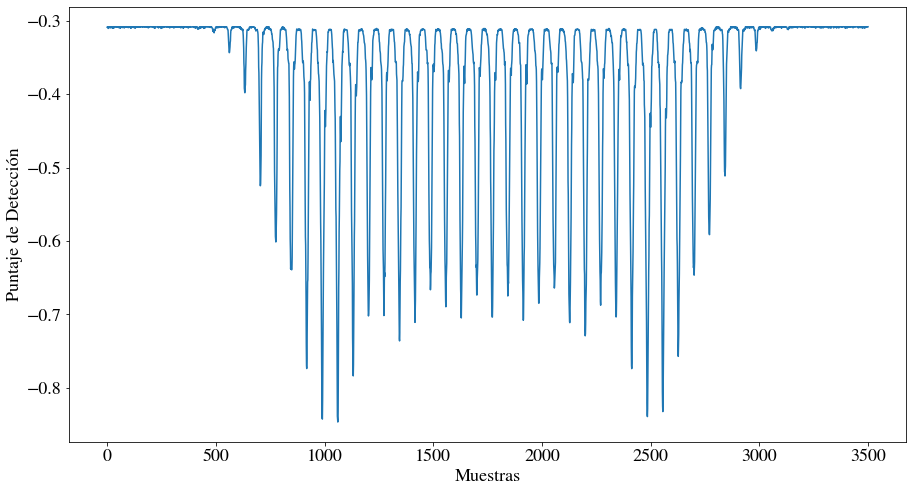

In [ ]:
matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
plt.figure(figsize=(15,8))
plt.plot(np.arange(0,Puntaje.shape[0],1), Puntaje)
plt.xlabel('Muestras')
plt.ylabel('Puntaje de Detección')
plt.show()

In [ ]:
ground_truth = np.ones(len(data_mW_norm), dtype = int)
n_error = (DA != ground_truth).sum() # número de datos atípicos
print("Número de muestras o filas de la base de datos con presencia de datos atípicos: ", n_error)

Número de muestras o filas de la base de datos con presencia de datos atípicos:  175


In [ ]:
data_mW_norm = pd.DataFrame(data_mW_norm, columns = columnas)
pos = np.where(DA == ground_truth)
pos = np.asarray(pos)
pos = np.hstack(pos)
data_sin_outilers_IF = data_mW_norm.loc[pos, :]

In [ ]:
print("Tamaño de los datos originales y normalizados: ",data_mW_norm.shape)
print("Tamaño de los datos filtrados: ", data_sin_outilers_IF.shape)

Tamaño de los datos originales y normalizados:  (3501, 91)
Tamaño de los datos filtrados:  (3326, 91)


In [ ]:
data_dBm_filtrado_IF = 10*np.log10(data_sin_outilers_IF.values/1e-3)
pos = np.where(data_dBm_filtrado_IF == np.NINF)
data_dBm_filtrado_IF = pd.DataFrame(data_dBm_filtrado_IF, columns = columnas)
data_dBm_filtrado_IF = data_dBm_filtrado_IF.replace(np.NINF,-210)
display(data_dBm_filtrado_IF.head(10))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


,Espectro 1,Espectro 2,Espectro 3,Espectro 4,Espectro 5,Espectro 6,Espectro 7,Espectro 8,Espectro 9,Espectro 10,...,Espectro 82,Espectro 83,Espectro 84,Espectro 85,Espectro 86,Espectro 87,Espectro 88,Espectro 89,Espectro 90,Espectro 91
0,-210.000000,-210.000000,-23.059996,-210.000000,-42.960007,-22.609999,-19.240002,-20.970001,-210.000000,-210.000000,...,-15.900000,-210.000000,-17.600000,-210.000000,-210.000000,-14.850002,-33.130001,-210.000000,-210.000000,-20.069996
1,-210.000000,-22.840000,-210.000000,-210.000000,-210.000000,-210.000000,-210.000000,-22.870003,-210.000000,-210.000000,...,-23.220003,-17.129999,-16.359999,-23.230000,-23.490005,-18.750002,-210.000000,-210.000000,-210.000000,-210.000000
2,-24.030001,-26.690006,-23.599998,-24.210003,-26.689999,-29.620001,-20.320000,-22.910004,-23.299999,-210.000000,...,-21.169998,-210.000000,-18.439997,-21.759996,-16.080002,-23.629997,-17.299999,-17.400000,-23.820002,-210.000000
3,-210.000000,-18.480000,-32.610001,-42.560001,-31.400002,-210.000000,-24.400002,-25.550003,-210.000000,-23.139999,...,-210.000000,-210.000000,-210.000000,-210.000000,-210.000000,-20.889999,-18.530001,-20.820005,-210.000000,-210.000000
4,-24.330004,-22.659998,-210.000000,-19.240000,-27.270000,-27.889997,-210.000000,-30.489998,-20.459999,-20.410004,...,-210.000000,-18.110001,-12.380001,-17.720001,-210.000000,-27.720001,-25.410000,-18.700001,-210.000000,-210.000000
5,-19.570000,-210.000000,-28.870003,-210.000000,-20.800001,-210.000000,-23.669996,-210.000000,-22.910004,-22.110004,...,-17.990000,-34.070000,-210.000000,-210.000000,-210.000000,-210.000000,-210.000000,-210.000000,-23.680004,-14.519998
6,-20.280001,-20.750004,-30.340002,-21.000002,-21.920002,-210.000000,-22.610001,-210.000000,-210.000000,-210.000000,...,-24.570000,-14.140003,-210.000000,-18.719995,-210.000000,-210.000000,-21.700001,-210.000000,-210.000000,-210.000000
7,-210.000000,-210.000000,-210.000000,-210.000000,-26.120003,-210.000000,-210.000000,-210.000000,-25.870003,-210.000000,...,-210.000000,-13.149997,-210.000000,-22.750006,-210.000000,-20.030001,-210.000000,-210.000000,-19.269999,-19.430000
8,-210.000000,-210.000000,-210.000000,-25.310003,-25.430000,-23.910006,-210.000000,-210.000000,-25.389999,-22.230000,...,-210.000000,-22.070000,-210.000000,-210.000000,-23.560005,-210.000000,-210.000000,-20.000002,-16.870001,-210.000000
9,-24.080002,-210.000000,-21.240004,-210.000000,-210.000000,-210.000000,-26.770004,-32.550007,-30.400005,-210.000000,...,-14.259998,-19.979998,-18.210003,-26.460003,-16.709999,-210.000000,-15.459999,-25.760000,-210.000000,-17.190001


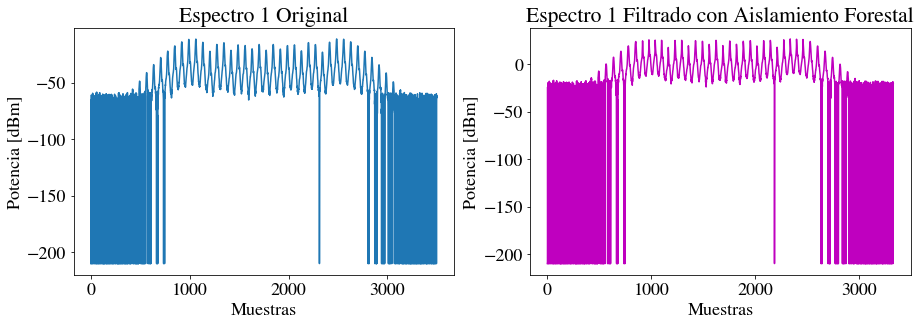

In [ ]:
matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(2, 2, 1)
ax.plot(np.arange(0,data.shape[0],1), data['Espectro 1'])
plt.xlabel('Muestras')
plt.ylabel('Potencia [dBm]')
plt.title('Espectro 1 Original')

ax = fig.add_subplot(2, 2, 2)
ax.plot(np.arange(0,data_dBm_filtrado_IF.shape[0],1), data_dBm_filtrado_IF['Espectro 1'],'m')
plt.xlabel('Muestras')
plt.ylabel('Potencia [dBm]')
plt.title('Espectro 1 Filtrado con Aislamiento Forestal')

plt.show()